# LightGBM
### Parameters:
System:
* **abilities**:
    * **cha**
    * **con**
    * **dex**
    * **int**
    * **str**
    * **wis**
* **attributes**
    * **hp**
    * **ac**
    * **perception**
    * **speed** (*land speed*)
        * **other speeds**: fly, climb, swim
    * **num immunities**
    * **resistances**: fire, cold, electricity, acid, piercing, slashing, physical, bludgeoning, mental, poison, all-damage
    * **weaknesses**: cold-iron, good, fire, cold, area-damage, splash-damage, evil, slashing
* **saves**
    * **fortitude**
    * **reflex**
    * **will**
* **resources**
    * **focus**

Items
* **items**
    * **melee**
    * **ranged**
    * **spells nr**

### Prediction: *level*

## Loading data

In [1]:
import numpy as np
import pandas as pd
import sys

import os
import pathlib

sys.path.append("../../..")
from training.creating_dataset import load_and_preprocess_data

current_path = os.getcwd()
DATASETS_DIR = pathlib.Path(current_path).parent.parent.parent / "pathfinder_2e_data"
DATASET_FILES = [
    "pathfinder-bestiary.db",
    "pathfinder-bestiary-2.db",
    "pathfinder-bestiary-3.db",
]
DATASET_PATHS = [f"{DATASETS_DIR}/{file}" for file in DATASET_FILES]
features = [
    "cha",
    "con",
    "dex",
    "int",
    "str",
    "wis",
    "ac",
    "hp",
    "perception",
    "fortitude",
    "reflex",
    "will",
    "focus",
    "land_speed",
    "num_immunities",
    "fly",
    "swim",
    "climb",
    "fire_resistance",
    "cold_resistance",
    "electricity_resistance",
    "acid_resistance",
    "piercing_resistance",
    "slashing_resistance",
    "physical_resistance",
    "bludgeoning_resistance",
    "mental_resistance",
    "poison_resistance",
    "all-damage_resistance",
    "cold-iron_weakness",
    "good_weakness",
    "fire_weakness",
    "cold_weakness",
    "area-damage_weakness",
    "splash-damage_weakness",
    "evil_weakness",
    "slashing_weakness",
    "melee",
    "ranged",
    "spells",
]

df = load_and_preprocess_data(
    DATASET_PATHS,
    characteristics=features,
)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1206 entries, 0 to 1205
Data columns (total 52 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   int                     1206 non-null   int64  
 1   will                    1206 non-null   int64  
 2   wis                     1206 non-null   int64  
 3   num_immunities          1206 non-null   int64  
 4   land_speed              1206 non-null   float64
 5   book                    1206 non-null   object 
 6   perception              1206 non-null   int64  
 7   level                   1206 non-null   int64  
 8   focus                   1206 non-null   int32  
 9   ac                      1206 non-null   int64  
 10  dex                     1206 non-null   int64  
 11  fortitude               1206 non-null   int64  
 12  reflex                  1206 non-null   int64  
 13  hp                      1206 non-null   int64  
 14  str                     1206 non-null   

In [3]:
df.head()

,int,will,wis,num_immunities,land_speed,book,perception,level,focus,ac,...,spells_nr_lvl_4,spells_nr_lvl_5,spells_nr_lvl_6,spells_nr_lvl_7,spells_nr_lvl_8,spells_nr_lvl_9,melee_max_bonus,avg_melee_dmg,ranged_max_bonus,avg_ranged_dmg
0,1,17,2,3,30.0,Pathfinder Bestiary,20,10,1,29,...,0,0,0,0,0,0,23,22.0,0,0.0
1,-4,16,2,0,35.0,Pathfinder Bestiary,16,10,0,28,...,0,0,0,0,0,0,23,22.0,0,0.0
2,-4,15,3,0,30.0,Pathfinder Bestiary,17,8,0,25,...,0,0,0,0,0,0,21,16.0,0,0.0
3,6,32,5,3,50.0,Pathfinder Bestiary,30,17,1,41,...,1,0,1,0,0,0,33,31.5,0,0.0
4,-1,4,1,0,0.0,Pathfinder Bestiary,6,1,1,16,...,1,0,0,0,0,0,0,0.0,8,5.0


###### Level

In [4]:
y = df["level"]
y

0       10
1       10
2        8
3       17
4        1
        ..
1201    20
1202    -1
1203    12
1204     6
1205     6
Name: level, Length: 1206, dtype: int64

In [5]:
from collections import defaultdict


lvl_stat = defaultdict(lambda: 0)

for lvl in y:
    lvl_stat[lvl] += 1

In [6]:
level_count = pd.DataFrame(
    data={
        "lvl": [key for key in sorted(lvl_stat.keys())],
        "count": [lvl_stat.get(key) for key in sorted(lvl_stat.keys())],
    }
)
level_count

,lvl,count
0,-1,34
1,0,27
2,1,127
3,2,121
4,3,95
5,4,82
6,5,76
7,6,72
8,7,77
9,8,68


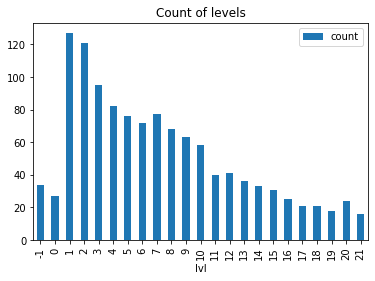

In [9]:
import matplotlib.pyplot as plt


level_count.plot.bar(x="lvl", y="count", title="Count of levels")

plt.savefig(f"../results_diagrams/other/Count of levels.svg")

plt.show()

## Train test split

### Chronological split

In [8]:
from training.splitting_dataset import split_dataframe


os.chdir("../../../training")
X_train, X_test, y_train, y_test = split_dataframe(df, test_size=0.31)
os.chdir("../notebooks/models/lightgbm")

In [9]:
X_train = X_train.drop(columns=["book"])
X_test = X_test.drop(columns=["book"])

### Random split

In [10]:
(
    X_train_random_split,
    X_test_random_split,
    y_train_random_split,
    y_test_random_split,
) = split_dataframe(df, chronological_split=False)

In [11]:
X_train_random_split = X_train_random_split.drop(columns=["book"])
X_test_random_split = X_test_random_split.drop(columns=["book"])

## LightGBM

## Chronological split

In [12]:
import lightgbm as lgb

lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

params = {
    "boosting_type": "gbdt",
    "objective": "regression",
    "metric": {"l2", "l1"},
}

gbm = lgb.train(
    params,
    lgb_train,
    num_boost_round=100,
    valid_sets=lgb_eval,
    callbacks=[lgb.early_stopping(stopping_rounds=5)],
)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000920 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 756
[LightGBM] [Info] Number of data points in the train set: 841, number of used features: 45
[LightGBM] [Info] Start training from score 6.966706
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[88]	valid_0's l1: 0.463517	valid_0's l2: 0.932502


In [13]:
y_pred_train = gbm.predict(X_train, num_iteration=gbm.best_iteration)
y_pred_test = gbm.predict(X_test, num_iteration=gbm.best_iteration)

In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error


rmse = mean_squared_error(y_test, y_pred_test, squared=False)
mae = mean_absolute_error(y_test, y_pred_test)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

RMSE: 0.97
MAE: 0.46


In [15]:
results = pd.DataFrame(
    data={
        "Split type": [],
        "Tuning type": [],
        "Set of features": [],
        "RMSE": [],
        "MAE": [],
    }
)

results.loc[0] = ["chronological", "default", "full", rmse, mae]

In [16]:
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
print(f"RMSE train: {rmse_train:.2f}")
print(f"RMSE test: {rmse_test:.2f}")

RMSE train: 0.13
RMSE test: 0.97


###### MAE by level

In [17]:
from training.results import plot_mae_by_level

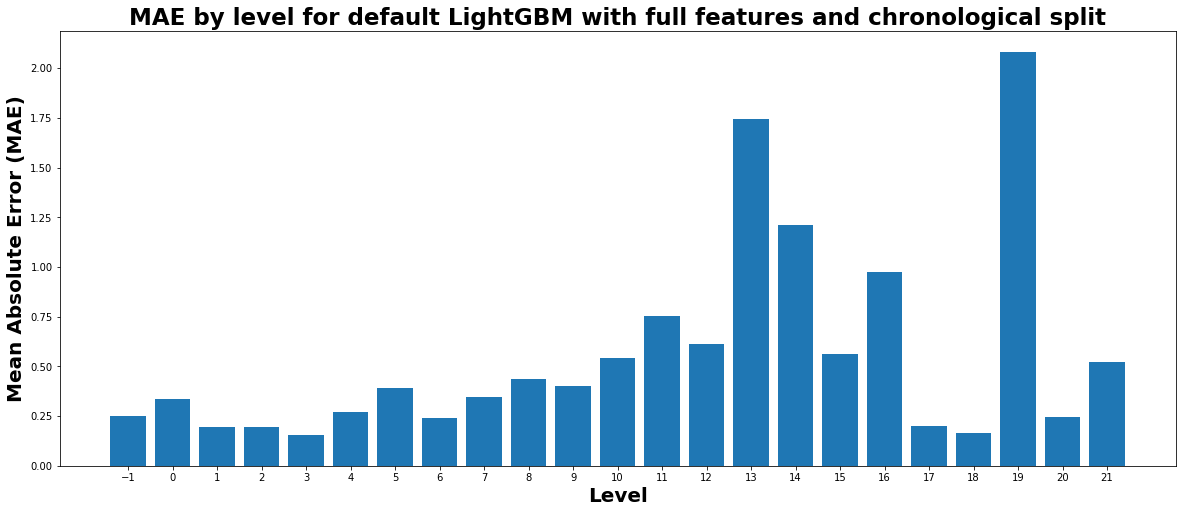

In [18]:
plot_mae_by_level(
    y_test,
    y_pred_test,
    title="MAE by level for default LightGBM with full features and chronological split",
)

In [19]:
from training.results import evaluate_round_predictions, plot_confusion_matrix


evaluate_round_predictions([0.5, 0.33, 0.45], y_test, y_pred_test)

Default:
RMSE: 0.97

Round type: 0.5
RMSE: 0.98

Round type: 0.33
RMSE: 0.96

Round type: 0.45
RMSE: 0.96



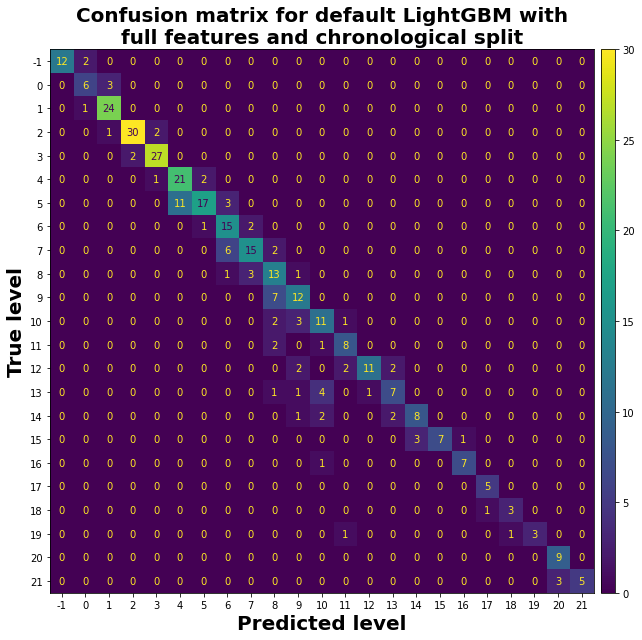

In [20]:
plot_confusion_matrix(
    y_pred_test,
    y_test,
    title="Confusion matrix for default LightGBM with\nfull features and chronological split",
)

#### Tuning

In [21]:
from training.results import assess_regression_model

In [22]:
import optuna.integration.lightgbm as lgb
from lightgbm import early_stopping, log_evaluation
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold


lgb_train = lgb.Dataset(X_train, y_train)

params = {
    "boosting_type": "gbdt",
    "objective": "regression",
    "metric": "l2",
    "verbosity": -1,
}

tuner = lgb.LightGBMTunerCV(
    params,
    lgb_train,
    folds=KFold(n_splits=5),
    num_boost_round=10000,
    callbacks=[early_stopping(100), log_evaluation(100)],
)

tuner.run()

[I 2023-11-10 12:01:32,668] A new study created in memory with name: no-name-7cbc132e-006b-4f9b-b1b1-d52ffe5a1fe1
feature_fraction, val_score: inf:   0%|                                                          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	cv_agg's l2: 0.149162 + 0.0385352
[200]	cv_agg's l2: 0.145245 + 0.0366082
[300]	cv_agg's l2: 0.144528 + 0.0360369


feature_fraction, val_score: 0.144186:  14%|######4                                      | 1/7 [00:06<00:41,  6.85s/it]

Early stopping, best iteration is:
[262]	cv_agg's l2: 0.144186 + 0.0362493
[100]	cv_agg's l2: 0.145984 + 0.0308765
[200]	cv_agg's l2: 0.141342 + 0.0291316
[300]	cv_agg's l2: 0.140713 + 0.0285508
[400]	cv_agg's l2: 0.140143 + 0.0281729
[500]	cv_agg's l2: 0.140022 + 0.0282435


feature_fraction, val_score: 0.139909:  14%|######4                                      | 1/7 [00:16<00:41,  6.85s/it]

[600]	cv_agg's l2: 0.140058 + 0.0281382
Early stopping, best iteration is:
[512]	cv_agg's l2: 0.139909 + 0.0281467


feature_fraction, val_score: 0.139909:  29%|############8                                | 2/7 [00:16<00:43,  8.77s/it]

[100]	cv_agg's l2: 0.150377 + 0.0346715
[200]	cv_agg's l2: 0.147366 + 0.034376
[300]	cv_agg's l2: 0.146827 + 0.0343263
[400]	cv_agg's l2: 0.146474 + 0.0343222
[500]	cv_agg's l2: 0.146221 + 0.034257


feature_fraction, val_score: 0.139909:  29%|############8                                | 2/7 [00:26<00:43,  8.77s/it]

[600]	cv_agg's l2: 0.146327 + 0.0342941
Early stopping, best iteration is:
[512]	cv_agg's l2: 0.139909 + 0.0281467


feature_fraction, val_score: 0.139909:  43%|###################2                         | 3/7 [00:26<00:36,  9.08s/it]

[100]	cv_agg's l2: 0.14059 + 0.0314911
[200]	cv_agg's l2: 0.137449 + 0.0310318
[300]	cv_agg's l2: 0.135829 + 0.0298936
[400]	cv_agg's l2: 0.135287 + 0.0295096
[500]	cv_agg's l2: 0.134972 + 0.0292666
[600]	cv_agg's l2: 0.134777 + 0.0290704


feature_fraction, val_score: 0.134777:  57%|#########################7                   | 4/7 [00:38<00:30, 10.27s/it]

[700]	cv_agg's l2: 0.134779 + 0.0292019
Early stopping, best iteration is:
[600]	cv_agg's l2: 0.134777 + 0.0290704
[100]	cv_agg's l2: 0.14758 + 0.0371168
[200]	cv_agg's l2: 0.142599 + 0.0351987
[300]	cv_agg's l2: 0.141527 + 0.0348701
[400]	cv_agg's l2: 0.141077 + 0.0343942
[500]	cv_agg's l2: 0.140876 + 0.0343709
[600]	cv_agg's l2: 0.140995 + 0.0344517


feature_fraction, val_score: 0.134777:  71%|################################1            | 5/7 [00:51<00:22, 11.18s/it]

[700]	cv_agg's l2: 0.140933 + 0.0345459
Early stopping, best iteration is:
[600]	cv_agg's l2: 0.134777 + 0.0290704
[100]	cv_agg's l2: 0.151393 + 0.0376705
[200]	cv_agg's l2: 0.149682 + 0.0372732
[300]	cv_agg's l2: 0.148998 + 0.037382
[400]	cv_agg's l2: 0.14885 + 0.0376311
[500]	cv_agg's l2: 0.148963 + 0.0379131
[600]	cv_agg's l2: 0.148958 + 0.0379088


feature_fraction, val_score: 0.134777:  86%|######################################5      | 6/7 [01:03<00:11, 11.48s/it]

[700]	cv_agg's l2: 0.149061 + 0.0378193
Early stopping, best iteration is:
[600]	cv_agg's l2: 0.134777 + 0.0290704
[100]	cv_agg's l2: 0.147242 + 0.0351278
[200]	cv_agg's l2: 0.143712 + 0.0340869
[300]	cv_agg's l2: 0.143063 + 0.034007
[400]	cv_agg's l2: 0.142757 + 0.0337817
[500]	cv_agg's l2: 0.142729 + 0.0336271
[600]	cv_agg's l2: 0.142755 + 0.0335428


feature_fraction, val_score: 0.134777: 100%|#############################################| 7/7 [01:17<00:00, 11.05s/it]


[700]	cv_agg's l2: 0.142828 + 0.0333623
Early stopping, best iteration is:
[600]	cv_agg's l2: 0.134777 + 0.0290704


num_leaves, val_score: 0.134777:   0%|                                                          | 0/20 [00:00<?, ?it/s]

[100]	cv_agg's l2: 0.14059 + 0.0314911
[200]	cv_agg's l2: 0.137449 + 0.0310318
[300]	cv_agg's l2: 0.135829 + 0.0298936
[400]	cv_agg's l2: 0.135287 + 0.0295096
[500]	cv_agg's l2: 0.134972 + 0.0292666
[600]	cv_agg's l2: 0.134777 + 0.0290704


num_leaves, val_score: 0.134777:   5%|##5                                               | 1/20 [00:12<04:06, 13.00s/it]

[700]	cv_agg's l2: 0.134779 + 0.0292019
Early stopping, best iteration is:
[600]	cv_agg's l2: 0.134777 + 0.0290704
[100]	cv_agg's l2: 0.14059 + 0.0314911
[200]	cv_agg's l2: 0.137449 + 0.0310318
[300]	cv_agg's l2: 0.135829 + 0.0298936
[400]	cv_agg's l2: 0.135287 + 0.0295096
[500]	cv_agg's l2: 0.134972 + 0.0292666
[600]	cv_agg's l2: 0.134777 + 0.0290704


num_leaves, val_score: 0.134777:  10%|#####                                             | 2/20 [00:26<04:03, 13.53s/it]

[700]	cv_agg's l2: 0.134779 + 0.0292019
Early stopping, best iteration is:
[600]	cv_agg's l2: 0.134777 + 0.0290704
[100]	cv_agg's l2: 0.14059 + 0.0314911
[200]	cv_agg's l2: 0.137449 + 0.0310318
[300]	cv_agg's l2: 0.135829 + 0.0298936
[400]	cv_agg's l2: 0.135287 + 0.0295096
[500]	cv_agg's l2: 0.134972 + 0.0292666
[600]	cv_agg's l2: 0.134777 + 0.0290704


num_leaves, val_score: 0.134777:  15%|#######5                                          | 3/20 [00:42<04:08, 14.61s/it]

[700]	cv_agg's l2: 0.134779 + 0.0292019
Early stopping, best iteration is:
[600]	cv_agg's l2: 0.134777 + 0.0290704
[100]	cv_agg's l2: 0.145024 + 0.0351091
[200]	cv_agg's l2: 0.138945 + 0.0340674
[300]	cv_agg's l2: 0.137212 + 0.0339558
[400]	cv_agg's l2: 0.136749 + 0.0337064
[500]	cv_agg's l2: 0.136767 + 0.0333383
[600]	cv_agg's l2: 0.136682 + 0.0332964


num_leaves, val_score: 0.134777:  20%|##########                                        | 4/20 [00:50<03:10, 11.90s/it]

[700]	cv_agg's l2: 0.136711 + 0.033199
Early stopping, best iteration is:
[600]	cv_agg's l2: 0.134777 + 0.0290704
[100]	cv_agg's l2: 0.14059 + 0.0314911
[200]	cv_agg's l2: 0.137449 + 0.0310318
[300]	cv_agg's l2: 0.135829 + 0.0298936
[400]	cv_agg's l2: 0.135287 + 0.0295096
[500]	cv_agg's l2: 0.134972 + 0.0292666
[600]	cv_agg's l2: 0.134777 + 0.0290704


num_leaves, val_score: 0.134777:  25%|############5                                     | 5/20 [01:04<03:10, 12.71s/it]

[700]	cv_agg's l2: 0.134779 + 0.0292019
Early stopping, best iteration is:
[600]	cv_agg's l2: 0.134777 + 0.0290704
[100]	cv_agg's l2: 0.14059 + 0.0314911
[200]	cv_agg's l2: 0.137449 + 0.0310318
[300]	cv_agg's l2: 0.135829 + 0.0298936
[400]	cv_agg's l2: 0.135287 + 0.0295096
[500]	cv_agg's l2: 0.134972 + 0.0292666
[600]	cv_agg's l2: 0.134777 + 0.0290704


num_leaves, val_score: 0.134777:  30%|###############                                   | 6/20 [01:19<03:06, 13.32s/it]

[700]	cv_agg's l2: 0.134779 + 0.0292019
Early stopping, best iteration is:
[600]	cv_agg's l2: 0.134777 + 0.0290704
[100]	cv_agg's l2: 0.14059 + 0.0314911
[200]	cv_agg's l2: 0.137449 + 0.0310318
[300]	cv_agg's l2: 0.135829 + 0.0298936
[400]	cv_agg's l2: 0.135287 + 0.0295096
[500]	cv_agg's l2: 0.134972 + 0.0292666
[600]	cv_agg's l2: 0.134777 + 0.0290704


num_leaves, val_score: 0.134777:  35%|#################5                                | 7/20 [01:34<02:59, 13.81s/it]

[700]	cv_agg's l2: 0.134779 + 0.0292019
Early stopping, best iteration is:
[600]	cv_agg's l2: 0.134777 + 0.0290704
[100]	cv_agg's l2: 0.249513 + 0.0306068
[200]	cv_agg's l2: 0.220358 + 0.0290311
[300]	cv_agg's l2: 0.20348 + 0.0267718
[400]	cv_agg's l2: 0.194331 + 0.0265451
[500]	cv_agg's l2: 0.187661 + 0.0255809
[600]	cv_agg's l2: 0.181176 + 0.0243991


num_leaves, val_score: 0.134777:  40%|####################                              | 8/20 [01:36<02:04, 10.34s/it]

[700]	cv_agg's l2: 0.177703 + 0.0227949
Early stopping, best iteration is:
[600]	cv_agg's l2: 0.134777 + 0.0290704
[100]	cv_agg's l2: 0.14059 + 0.0314911
[200]	cv_agg's l2: 0.137449 + 0.0310318
[300]	cv_agg's l2: 0.135829 + 0.0298936
[400]	cv_agg's l2: 0.135287 + 0.0295096
[500]	cv_agg's l2: 0.134972 + 0.0292666
[600]	cv_agg's l2: 0.134777 + 0.0290704


num_leaves, val_score: 0.134777:  45%|######################5                           | 9/20 [01:51<02:06, 11.52s/it]

[700]	cv_agg's l2: 0.134779 + 0.0292019
Early stopping, best iteration is:
[600]	cv_agg's l2: 0.134777 + 0.0290704
[100]	cv_agg's l2: 0.14059 + 0.0314911
[200]	cv_agg's l2: 0.137449 + 0.0310318
[300]	cv_agg's l2: 0.135829 + 0.0298936
[400]	cv_agg's l2: 0.135287 + 0.0295096
[500]	cv_agg's l2: 0.134972 + 0.0292666
[600]	cv_agg's l2: 0.134777 + 0.0290704


num_leaves, val_score: 0.134777:  50%|########################5                        | 10/20 [02:04<02:02, 12.20s/it]

[700]	cv_agg's l2: 0.134779 + 0.0292019
Early stopping, best iteration is:
[600]	cv_agg's l2: 0.134777 + 0.0290704
[100]	cv_agg's l2: 0.14059 + 0.0314911
[200]	cv_agg's l2: 0.137449 + 0.0310318
[300]	cv_agg's l2: 0.135829 + 0.0298936
[400]	cv_agg's l2: 0.135287 + 0.0295096
[500]	cv_agg's l2: 0.134972 + 0.0292666
[600]	cv_agg's l2: 0.134777 + 0.0290704


num_leaves, val_score: 0.134777:  55%|##########################9                      | 11/20 [02:20<02:00, 13.38s/it]

[700]	cv_agg's l2: 0.134779 + 0.0292019
Early stopping, best iteration is:
[600]	cv_agg's l2: 0.134777 + 0.0290704
[100]	cv_agg's l2: 0.14059 + 0.0314911
[200]	cv_agg's l2: 0.137449 + 0.0310318
[300]	cv_agg's l2: 0.135829 + 0.0298936
[400]	cv_agg's l2: 0.135287 + 0.0295096
[500]	cv_agg's l2: 0.134972 + 0.0292666
[600]	cv_agg's l2: 0.134777 + 0.0290704


num_leaves, val_score: 0.134777:  60%|#############################4                   | 12/20 [02:34<01:47, 13.49s/it]

[700]	cv_agg's l2: 0.134779 + 0.0292019
Early stopping, best iteration is:
[600]	cv_agg's l2: 0.134777 + 0.0290704
[100]	cv_agg's l2: 0.14059 + 0.0314911
[200]	cv_agg's l2: 0.137449 + 0.0310318
[300]	cv_agg's l2: 0.135829 + 0.0298936
[400]	cv_agg's l2: 0.135287 + 0.0295096
[500]	cv_agg's l2: 0.134972 + 0.0292666
[600]	cv_agg's l2: 0.134777 + 0.0290704


num_leaves, val_score: 0.134777:  65%|###############################8                 | 13/20 [02:46<01:30, 12.96s/it]

[700]	cv_agg's l2: 0.134779 + 0.0292019
Early stopping, best iteration is:
[600]	cv_agg's l2: 0.134777 + 0.0290704
[100]	cv_agg's l2: 0.14059 + 0.0314911
[200]	cv_agg's l2: 0.137449 + 0.0310318
[300]	cv_agg's l2: 0.135829 + 0.0298936
[400]	cv_agg's l2: 0.135287 + 0.0295096
[500]	cv_agg's l2: 0.134972 + 0.0292666
[600]	cv_agg's l2: 0.134777 + 0.0290704


num_leaves, val_score: 0.134777:  70%|##################################3              | 14/20 [03:00<01:19, 13.29s/it]

[700]	cv_agg's l2: 0.134779 + 0.0292019
Early stopping, best iteration is:
[600]	cv_agg's l2: 0.134777 + 0.0290704
[100]	cv_agg's l2: 0.14059 + 0.0314911
[200]	cv_agg's l2: 0.137449 + 0.0310318
[300]	cv_agg's l2: 0.135829 + 0.0298936
[400]	cv_agg's l2: 0.135287 + 0.0295096
[500]	cv_agg's l2: 0.134972 + 0.0292666
[600]	cv_agg's l2: 0.134777 + 0.0290704


num_leaves, val_score: 0.134777:  75%|####################################7            | 15/20 [03:15<01:08, 13.72s/it]

[700]	cv_agg's l2: 0.134779 + 0.0292019
Early stopping, best iteration is:
[600]	cv_agg's l2: 0.134777 + 0.0290704
[100]	cv_agg's l2: 0.14059 + 0.0314911
[200]	cv_agg's l2: 0.137449 + 0.0310318
[300]	cv_agg's l2: 0.135829 + 0.0298936
[400]	cv_agg's l2: 0.135287 + 0.0295096
[500]	cv_agg's l2: 0.134972 + 0.0292666
[600]	cv_agg's l2: 0.134777 + 0.0290704


num_leaves, val_score: 0.134777:  80%|#######################################2         | 16/20 [03:30<00:56, 14.18s/it]

[700]	cv_agg's l2: 0.134779 + 0.0292019
Early stopping, best iteration is:
[600]	cv_agg's l2: 0.134777 + 0.0290704
[100]	cv_agg's l2: 0.14059 + 0.0314911
[200]	cv_agg's l2: 0.137449 + 0.0310318
[300]	cv_agg's l2: 0.135829 + 0.0298936
[400]	cv_agg's l2: 0.135287 + 0.0295096
[500]	cv_agg's l2: 0.134972 + 0.0292666
[600]	cv_agg's l2: 0.134777 + 0.0290704


num_leaves, val_score: 0.134777:  85%|#########################################6       | 17/20 [03:44<00:42, 14.13s/it]

[700]	cv_agg's l2: 0.134779 + 0.0292019
Early stopping, best iteration is:
[600]	cv_agg's l2: 0.134777 + 0.0290704
[100]	cv_agg's l2: 0.14059 + 0.0314911
[200]	cv_agg's l2: 0.137449 + 0.0310318
[300]	cv_agg's l2: 0.135829 + 0.0298936
[400]	cv_agg's l2: 0.135287 + 0.0295096
[500]	cv_agg's l2: 0.134972 + 0.0292666
[600]	cv_agg's l2: 0.134777 + 0.0290704


num_leaves, val_score: 0.134777:  90%|############################################1    | 18/20 [03:57<00:27, 13.94s/it]

[700]	cv_agg's l2: 0.134779 + 0.0292019
Early stopping, best iteration is:
[600]	cv_agg's l2: 0.134777 + 0.0290704
[100]	cv_agg's l2: 0.14059 + 0.0314911
[200]	cv_agg's l2: 0.137449 + 0.0310318
[300]	cv_agg's l2: 0.135829 + 0.0298936
[400]	cv_agg's l2: 0.135287 + 0.0295096
[500]	cv_agg's l2: 0.134972 + 0.0292666
[600]	cv_agg's l2: 0.134777 + 0.0290704


num_leaves, val_score: 0.134777:  95%|##############################################5  | 19/20 [04:10<00:13, 13.70s/it]

[700]	cv_agg's l2: 0.134779 + 0.0292019
Early stopping, best iteration is:
[600]	cv_agg's l2: 0.134777 + 0.0290704
[100]	cv_agg's l2: 0.14059 + 0.0314911
[200]	cv_agg's l2: 0.137449 + 0.0310318
[300]	cv_agg's l2: 0.135829 + 0.0298936
[400]	cv_agg's l2: 0.135287 + 0.0295096
[500]	cv_agg's l2: 0.134972 + 0.0292666
[600]	cv_agg's l2: 0.134777 + 0.0290704


num_leaves, val_score: 0.134777: 100%|#################################################| 20/20 [04:24<00:00, 13.21s/it]


[700]	cv_agg's l2: 0.134779 + 0.0292019
Early stopping, best iteration is:
[600]	cv_agg's l2: 0.134777 + 0.0290704


bagging, val_score: 0.134777:   0%|                                                             | 0/10 [00:00<?, ?it/s]

[100]	cv_agg's l2: 0.185518 + 0.0337948
[200]	cv_agg's l2: 0.176415 + 0.0362823
[300]	cv_agg's l2: 0.17536 + 0.0355131
[400]	cv_agg's l2: 0.172379 + 0.0317188
[500]	cv_agg's l2: 0.173134 + 0.0323922
[600]	cv_agg's l2: 0.171277 + 0.0328509


bagging, val_score: 0.134777:  10%|#####3                                               | 1/10 [00:06<01:00,  6.78s/it]

[700]	cv_agg's l2: 0.174952 + 0.0330387
Early stopping, best iteration is:
[600]	cv_agg's l2: 0.134777 + 0.0290704
[100]	cv_agg's l2: 0.138015 + 0.030459
[200]	cv_agg's l2: 0.134136 + 0.0286951
[300]	cv_agg's l2: 0.133239 + 0.0278966
[400]	cv_agg's l2: 0.132372 + 0.0275383
[500]	cv_agg's l2: 0.132186 + 0.027287
[600]	cv_agg's l2: 0.132023 + 0.0271658
[700]	cv_agg's l2: 0.131907 + 0.0270761


bagging, val_score: 0.131846:  20%|##########6                                          | 2/10 [00:21<01:29, 11.20s/it]

Early stopping, best iteration is:
[653]	cv_agg's l2: 0.131846 + 0.027081
[100]	cv_agg's l2: 0.140347 + 0.0266515
[200]	cv_agg's l2: 0.136494 + 0.0263171
[300]	cv_agg's l2: 0.135654 + 0.0259986
[400]	cv_agg's l2: 0.134824 + 0.0257505
[500]	cv_agg's l2: 0.13503 + 0.0255621
[600]	cv_agg's l2: 0.134731 + 0.025252
[700]	cv_agg's l2: 0.134772 + 0.0251032


bagging, val_score: 0.131846:  30%|###############9                                     | 3/10 [00:35<01:28, 12.64s/it]

Early stopping, best iteration is:
[653]	cv_agg's l2: 0.131846 + 0.027081
[100]	cv_agg's l2: 0.140011 + 0.0287938
[200]	cv_agg's l2: 0.135346 + 0.0284802
[300]	cv_agg's l2: 0.134068 + 0.0290055
[400]	cv_agg's l2: 0.133753 + 0.0288854
[500]	cv_agg's l2: 0.133572 + 0.0288575
[600]	cv_agg's l2: 0.13339 + 0.0289208
[700]	cv_agg's l2: 0.133485 + 0.0289432


bagging, val_score: 0.131846:  40%|#####################2                               | 4/10 [00:52<01:25, 14.32s/it]

Early stopping, best iteration is:
[653]	cv_agg's l2: 0.131846 + 0.027081
[100]	cv_agg's l2: 0.141513 + 0.030771
[200]	cv_agg's l2: 0.138851 + 0.0300351
[300]	cv_agg's l2: 0.138742 + 0.0300346
[400]	cv_agg's l2: 0.138327 + 0.0299813
[500]	cv_agg's l2: 0.138291 + 0.030012
[600]	cv_agg's l2: 0.138167 + 0.029791
[700]	cv_agg's l2: 0.138004 + 0.0297926


bagging, val_score: 0.131846:  50%|##########################5                          | 5/10 [01:07<01:13, 14.67s/it]

Early stopping, best iteration is:
[653]	cv_agg's l2: 0.131846 + 0.027081
[100]	cv_agg's l2: 0.140888 + 0.0292008
[200]	cv_agg's l2: 0.136399 + 0.0280856
[300]	cv_agg's l2: 0.135088 + 0.0273538
[400]	cv_agg's l2: 0.134844 + 0.0272678
[500]	cv_agg's l2: 0.134574 + 0.0272741
[600]	cv_agg's l2: 0.134412 + 0.0271327
[700]	cv_agg's l2: 0.134416 + 0.0271364


bagging, val_score: 0.131846:  60%|###############################8                     | 6/10 [01:23<00:59, 14.96s/it]

Early stopping, best iteration is:
[653]	cv_agg's l2: 0.131846 + 0.027081
[100]	cv_agg's l2: 0.139624 + 0.0318725
[200]	cv_agg's l2: 0.136384 + 0.0302056
[300]	cv_agg's l2: 0.13529 + 0.0297337
[400]	cv_agg's l2: 0.135111 + 0.0300992
[500]	cv_agg's l2: 0.134811 + 0.0299517
[600]	cv_agg's l2: 0.134723 + 0.0298236
[700]	cv_agg's l2: 0.134521 + 0.029605


bagging, val_score: 0.131846:  70%|#####################################                | 7/10 [01:41<00:47, 15.96s/it]

Early stopping, best iteration is:
[653]	cv_agg's l2: 0.131846 + 0.027081
[100]	cv_agg's l2: 0.14059 + 0.0314911
[200]	cv_agg's l2: 0.137449 + 0.0310318
[300]	cv_agg's l2: 0.135829 + 0.0298936
[400]	cv_agg's l2: 0.135287 + 0.0295096
[500]	cv_agg's l2: 0.134972 + 0.0292666
[600]	cv_agg's l2: 0.134777 + 0.0290704
[700]	cv_agg's l2: 0.134779 + 0.0292019


bagging, val_score: 0.131846:  80%|##########################################4          | 8/10 [01:56<00:31, 15.71s/it]

Early stopping, best iteration is:
[653]	cv_agg's l2: 0.131846 + 0.027081
[100]	cv_agg's l2: 0.138947 + 0.0278205
[200]	cv_agg's l2: 0.135734 + 0.0272658
[300]	cv_agg's l2: 0.134506 + 0.0270684
[400]	cv_agg's l2: 0.134072 + 0.0269852
[500]	cv_agg's l2: 0.134034 + 0.0268842
[600]	cv_agg's l2: 0.134046 + 0.0265533
[700]	cv_agg's l2: 0.134083 + 0.0263455


bagging, val_score: 0.131846:  90%|###############################################7     | 9/10 [02:14<00:16, 16.47s/it]

Early stopping, best iteration is:
[653]	cv_agg's l2: 0.131846 + 0.027081
[100]	cv_agg's l2: 0.15305 + 0.0399027
[200]	cv_agg's l2: 0.147447 + 0.0396679
[300]	cv_agg's l2: 0.14678 + 0.0388843
[400]	cv_agg's l2: 0.145822 + 0.0383914
[500]	cv_agg's l2: 0.145282 + 0.0383115
[600]	cv_agg's l2: 0.145324 + 0.0382255
[700]	cv_agg's l2: 0.145149 + 0.0381242


bagging, val_score: 0.131846: 100%|####################################################| 10/10 [02:29<00:00, 14.94s/it]


Early stopping, best iteration is:
[653]	cv_agg's l2: 0.131846 + 0.027081


feature_fraction_stage2, val_score: 0.131846:   0%|                                              | 0/6 [00:00<?, ?it/s]

[100]	cv_agg's l2: 0.150649 + 0.0334891
[200]	cv_agg's l2: 0.143639 + 0.0314355
[300]	cv_agg's l2: 0.143244 + 0.0314721
[400]	cv_agg's l2: 0.142156 + 0.0313146
[500]	cv_agg's l2: 0.142002 + 0.0314366
[600]	cv_agg's l2: 0.141547 + 0.0310336
[700]	cv_agg's l2: 0.141529 + 0.0309631


feature_fraction_stage2, val_score: 0.131846:  17%|######3                               | 1/6 [00:17<01:27, 17.50s/it]

Early stopping, best iteration is:
[653]	cv_agg's l2: 0.131846 + 0.027081
[100]	cv_agg's l2: 0.140598 + 0.0307719
[200]	cv_agg's l2: 0.135041 + 0.0285908
[300]	cv_agg's l2: 0.13408 + 0.0287991
[400]	cv_agg's l2: 0.133642 + 0.0287701
[500]	cv_agg's l2: 0.13334 + 0.0291182
[600]	cv_agg's l2: 0.133125 + 0.0290852
[700]	cv_agg's l2: 0.133055 + 0.0292426


feature_fraction_stage2, val_score: 0.131846:  33%|############6                         | 2/6 [00:32<01:03, 15.84s/it]

Early stopping, best iteration is:
[653]	cv_agg's l2: 0.131846 + 0.027081
[100]	cv_agg's l2: 0.141036 + 0.0294063
[200]	cv_agg's l2: 0.137156 + 0.0277777
[300]	cv_agg's l2: 0.136183 + 0.0280236
[400]	cv_agg's l2: 0.135559 + 0.0280054
[500]	cv_agg's l2: 0.135457 + 0.0280847
[600]	cv_agg's l2: 0.135326 + 0.027993
[700]	cv_agg's l2: 0.135188 + 0.0279415


feature_fraction_stage2, val_score: 0.131846:  50%|###################                   | 3/6 [00:46<00:45, 15.07s/it]

Early stopping, best iteration is:
[653]	cv_agg's l2: 0.131846 + 0.027081
[100]	cv_agg's l2: 0.14923 + 0.0320956
[200]	cv_agg's l2: 0.143587 + 0.0299514
[300]	cv_agg's l2: 0.142219 + 0.0296012
[400]	cv_agg's l2: 0.141712 + 0.0295836
[500]	cv_agg's l2: 0.141544 + 0.0295631
[600]	cv_agg's l2: 0.141456 + 0.0295501
[700]	cv_agg's l2: 0.141482 + 0.029534


feature_fraction_stage2, val_score: 0.131846:  67%|#########################3            | 4/6 [00:54<00:24, 12.15s/it]

Early stopping, best iteration is:
[653]	cv_agg's l2: 0.131846 + 0.027081
[100]	cv_agg's l2: 0.142285 + 0.0281248
[200]	cv_agg's l2: 0.137075 + 0.0272494
[300]	cv_agg's l2: 0.137016 + 0.0269009
[400]	cv_agg's l2: 0.136915 + 0.027334
[500]	cv_agg's l2: 0.136526 + 0.0272533
[600]	cv_agg's l2: 0.136485 + 0.0272363
[700]	cv_agg's l2: 0.136523 + 0.0272443


feature_fraction_stage2, val_score: 0.131846:  83%|###############################6      | 5/6 [00:59<00:09,  9.66s/it]

Early stopping, best iteration is:
[653]	cv_agg's l2: 0.131846 + 0.027081
[100]	cv_agg's l2: 0.141917 + 0.0307693
[200]	cv_agg's l2: 0.136582 + 0.0288977
[300]	cv_agg's l2: 0.135193 + 0.0289408
[400]	cv_agg's l2: 0.134891 + 0.0290992
[500]	cv_agg's l2: 0.134479 + 0.0291379
[600]	cv_agg's l2: 0.134374 + 0.0290333
[700]	cv_agg's l2: 0.134187 + 0.0289298


feature_fraction_stage2, val_score: 0.131846: 100%|######################################| 6/6 [01:04<00:00, 10.75s/it]


Early stopping, best iteration is:
[653]	cv_agg's l2: 0.131846 + 0.027081


regularization_factors, val_score: 0.131846:   0%|                                              | 0/20 [00:00<?, ?it/s]

[100]	cv_agg's l2: 0.138619 + 0.0285604
[200]	cv_agg's l2: 0.134237 + 0.0265141
[300]	cv_agg's l2: 0.133336 + 0.0266392
[400]	cv_agg's l2: 0.133741 + 0.0270309
[500]	cv_agg's l2: 0.133788 + 0.0270498
[600]	cv_agg's l2: 0.133689 + 0.026763
[700]	cv_agg's l2: 0.133728 + 0.0267816


regularization_factors, val_score: 0.131846:   5%|#9                                    | 1/20 [00:04<01:30,  4.76s/it]

Early stopping, best iteration is:
[653]	cv_agg's l2: 0.131846 + 0.027081
[100]	cv_agg's l2: 0.139327 + 0.0280278
[200]	cv_agg's l2: 0.134648 + 0.0264422
[300]	cv_agg's l2: 0.133841 + 0.0260997
[400]	cv_agg's l2: 0.13412 + 0.0269374
[500]	cv_agg's l2: 0.133929 + 0.0271372
[600]	cv_agg's l2: 0.133984 + 0.0272083
[700]	cv_agg's l2: 0.134089 + 0.0273067
Early stopping, best iteration is:
[653]	cv_agg's l2: 0.131846 + 0.027081


regularization_factors, val_score: 0.131846:  10%|###8                                  | 2/20 [00:09<01:20,  4.46s/it]

[100]	cv_agg's l2: 0.145001 + 0.0318422
[200]	cv_agg's l2: 0.139245 + 0.0306022
[300]	cv_agg's l2: 0.138067 + 0.030465
[400]	cv_agg's l2: 0.138099 + 0.030479
[500]	cv_agg's l2: 0.137956 + 0.0304538
[600]	cv_agg's l2: 0.137956 + 0.0304538
[700]	cv_agg's l2: 0.137956 + 0.0304538


regularization_factors, val_score: 0.131846:  15%|#####7                                | 3/20 [00:11<01:00,  3.54s/it]

Early stopping, best iteration is:
[653]	cv_agg's l2: 0.131846 + 0.027081
[100]	cv_agg's l2: 0.139528 + 0.0293107
[200]	cv_agg's l2: 0.136042 + 0.0276662
[300]	cv_agg's l2: 0.134596 + 0.0275959
[400]	cv_agg's l2: 0.134231 + 0.0275206
[500]	cv_agg's l2: 0.134256 + 0.0275077
[600]	cv_agg's l2: 0.134103 + 0.0274091
[700]	cv_agg's l2: 0.133941 + 0.0273809


regularization_factors, val_score: 0.131846:  20%|#######6                              | 4/20 [00:16<01:04,  4.06s/it]

Early stopping, best iteration is:
[653]	cv_agg's l2: 0.131846 + 0.027081
[100]	cv_agg's l2: 0.138575 + 0.0299792
[200]	cv_agg's l2: 0.13527 + 0.0291964
[300]	cv_agg's l2: 0.134966 + 0.0291219
[400]	cv_agg's l2: 0.134612 + 0.0288233
[500]	cv_agg's l2: 0.134323 + 0.0286448
[600]	cv_agg's l2: 0.134153 + 0.0285093
[700]	cv_agg's l2: 0.134087 + 0.0285015


regularization_factors, val_score: 0.131846:  25%|#########5                            | 5/20 [00:21<01:08,  4.57s/it]

Early stopping, best iteration is:
[653]	cv_agg's l2: 0.131846 + 0.027081
[100]	cv_agg's l2: 0.138015 + 0.030459
[200]	cv_agg's l2: 0.134136 + 0.0286951
[300]	cv_agg's l2: 0.133239 + 0.0278966
[400]	cv_agg's l2: 0.132291 + 0.0276709
[500]	cv_agg's l2: 0.132149 + 0.0273452
[600]	cv_agg's l2: 0.131976 + 0.0272198
[700]	cv_agg's l2: 0.131965 + 0.0270769


regularization_factors, val_score: 0.131846:  30%|###########4                          | 6/20 [00:27<01:07,  4.85s/it]

Early stopping, best iteration is:
[653]	cv_agg's l2: 0.131846 + 0.027081
[100]	cv_agg's l2: 0.139317 + 0.0297007
[200]	cv_agg's l2: 0.135671 + 0.0285627
[300]	cv_agg's l2: 0.13464 + 0.028159
[400]	cv_agg's l2: 0.133886 + 0.0277669
[500]	cv_agg's l2: 0.13365 + 0.0276842
[600]	cv_agg's l2: 0.13339 + 0.0274416
[700]	cv_agg's l2: 0.133232 + 0.0273494


regularization_factors, val_score: 0.131846:  35%|#############3                        | 7/20 [00:32<01:05,  5.02s/it]

Early stopping, best iteration is:
[653]	cv_agg's l2: 0.131846 + 0.027081
[100]	cv_agg's l2: 0.139079 + 0.0293946
[200]	cv_agg's l2: 0.135332 + 0.0281187
[300]	cv_agg's l2: 0.134247 + 0.0277502
[400]	cv_agg's l2: 0.133352 + 0.0272468
[500]	cv_agg's l2: 0.132886 + 0.0270481
[600]	cv_agg's l2: 0.132766 + 0.0267885
[700]	cv_agg's l2: 0.132713 + 0.0266879


regularization_factors, val_score: 0.131846:  40%|###############2                      | 8/20 [00:37<01:01,  5.14s/it]

Early stopping, best iteration is:
[653]	cv_agg's l2: 0.131846 + 0.027081
[100]	cv_agg's l2: 0.139079 + 0.0293946
[200]	cv_agg's l2: 0.135332 + 0.0281187
[300]	cv_agg's l2: 0.134247 + 0.0277502
[400]	cv_agg's l2: 0.133352 + 0.0272468
[500]	cv_agg's l2: 0.132886 + 0.0270481
[600]	cv_agg's l2: 0.132766 + 0.0267885
[700]	cv_agg's l2: 0.132713 + 0.0266879


regularization_factors, val_score: 0.131846:  45%|#################1                    | 9/20 [00:43<00:56,  5.18s/it]

Early stopping, best iteration is:
[653]	cv_agg's l2: 0.131846 + 0.027081
[100]	cv_agg's l2: 0.139079 + 0.0293942
[200]	cv_agg's l2: 0.135331 + 0.0281185
[300]	cv_agg's l2: 0.134271 + 0.0277704
[400]	cv_agg's l2: 0.133424 + 0.0273078
[500]	cv_agg's l2: 0.133184 + 0.0273003
[600]	cv_agg's l2: 0.133032 + 0.0270095
[700]	cv_agg's l2: 0.132979 + 0.0269063


regularization_factors, val_score: 0.131846:  50%|##################5                  | 10/20 [00:48<00:52,  5.27s/it]

Early stopping, best iteration is:
[653]	cv_agg's l2: 0.131846 + 0.027081
[100]	cv_agg's l2: 0.137704 + 0.0307962
[200]	cv_agg's l2: 0.135211 + 0.0295111
[300]	cv_agg's l2: 0.134008 + 0.0288676
[400]	cv_agg's l2: 0.133771 + 0.0288119
[500]	cv_agg's l2: 0.133799 + 0.0285353
[600]	cv_agg's l2: 0.133619 + 0.028452
[700]	cv_agg's l2: 0.133565 + 0.0283891


regularization_factors, val_score: 0.131846:  55%|####################3                | 11/20 [00:54<00:47,  5.31s/it]

Early stopping, best iteration is:
[653]	cv_agg's l2: 0.131846 + 0.027081
[100]	cv_agg's l2: 0.138882 + 0.0291455
[200]	cv_agg's l2: 0.134725 + 0.0277664
[300]	cv_agg's l2: 0.13377 + 0.0270404
[400]	cv_agg's l2: 0.132908 + 0.0266735
[500]	cv_agg's l2: 0.132635 + 0.0265534
[600]	cv_agg's l2: 0.132499 + 0.026369
[700]	cv_agg's l2: 0.132449 + 0.0262256


regularization_factors, val_score: 0.131846:  60%|######################2              | 12/20 [00:59<00:43,  5.41s/it]

Early stopping, best iteration is:
[653]	cv_agg's l2: 0.131846 + 0.027081
[100]	cv_agg's l2: 0.138882 + 0.0291455
[200]	cv_agg's l2: 0.134725 + 0.0277664
[300]	cv_agg's l2: 0.13377 + 0.0270404
[400]	cv_agg's l2: 0.132908 + 0.0266735
[500]	cv_agg's l2: 0.132635 + 0.0265534
[600]	cv_agg's l2: 0.132499 + 0.026369
[700]	cv_agg's l2: 0.132449 + 0.0262256


regularization_factors, val_score: 0.131846:  65%|########################             | 13/20 [01:04<00:37,  5.34s/it]

Early stopping, best iteration is:
[653]	cv_agg's l2: 0.131846 + 0.027081
[100]	cv_agg's l2: 0.138015 + 0.030459
[200]	cv_agg's l2: 0.134136 + 0.0286951
[300]	cv_agg's l2: 0.133239 + 0.0278966
[400]	cv_agg's l2: 0.132268 + 0.0276512
[500]	cv_agg's l2: 0.132213 + 0.0273996
[600]	cv_agg's l2: 0.132117 + 0.0273213
[700]	cv_agg's l2: 0.132067 + 0.0271924


regularization_factors, val_score: 0.131846:  70%|#########################9           | 14/20 [01:10<00:31,  5.29s/it]

Early stopping, best iteration is:
[653]	cv_agg's l2: 0.131846 + 0.027081
[100]	cv_agg's l2: 0.138015 + 0.030459
[200]	cv_agg's l2: 0.134375 + 0.0285853
[300]	cv_agg's l2: 0.133146 + 0.0278053
[400]	cv_agg's l2: 0.132109 + 0.0274017
[500]	cv_agg's l2: 0.132113 + 0.0273896
[600]	cv_agg's l2: 0.132076 + 0.0272831
[700]	cv_agg's l2: 0.131993 + 0.02714


regularization_factors, val_score: 0.131846:  75%|###########################7         | 15/20 [01:15<00:26,  5.32s/it]

Early stopping, best iteration is:
[653]	cv_agg's l2: 0.131846 + 0.027081
[100]	cv_agg's l2: 0.138015 + 0.030459
[200]	cv_agg's l2: 0.134375 + 0.0285853
[300]	cv_agg's l2: 0.133146 + 0.0278053
[400]	cv_agg's l2: 0.132109 + 0.0274017
[500]	cv_agg's l2: 0.132113 + 0.0273896
[600]	cv_agg's l2: 0.132076 + 0.0272831
[700]	cv_agg's l2: 0.131993 + 0.02714


regularization_factors, val_score: 0.131846:  80%|#############################6       | 16/20 [01:21<00:21,  5.39s/it]

Early stopping, best iteration is:
[653]	cv_agg's l2: 0.131846 + 0.027081
[100]	cv_agg's l2: 0.138015 + 0.030459
[200]	cv_agg's l2: 0.134375 + 0.0285853
[300]	cv_agg's l2: 0.133146 + 0.0278053
[400]	cv_agg's l2: 0.132109 + 0.0274017
[500]	cv_agg's l2: 0.132125 + 0.0273704
[600]	cv_agg's l2: 0.13208 + 0.0272772
[700]	cv_agg's l2: 0.131999 + 0.0271317


regularization_factors, val_score: 0.131846:  85%|###############################4     | 17/20 [01:26<00:16,  5.43s/it]

Early stopping, best iteration is:
[653]	cv_agg's l2: 0.131846 + 0.027081
[100]	cv_agg's l2: 0.138015 + 0.0304589
[200]	cv_agg's l2: 0.134252 + 0.0286406
[300]	cv_agg's l2: 0.133069 + 0.027841
[400]	cv_agg's l2: 0.132117 + 0.027398
[500]	cv_agg's l2: 0.132181 + 0.0273456
[600]	cv_agg's l2: 0.132148 + 0.0272455
[700]	cv_agg's l2: 0.132091 + 0.0270587


regularization_factors, val_score: 0.131846:  90%|#################################3   | 18/20 [01:31<00:10,  5.43s/it]

Early stopping, best iteration is:
[653]	cv_agg's l2: 0.131846 + 0.027081
[100]	cv_agg's l2: 0.138015 + 0.030459
[200]	cv_agg's l2: 0.134375 + 0.0285853
[300]	cv_agg's l2: 0.133146 + 0.0278053
[400]	cv_agg's l2: 0.132141 + 0.0273878
[500]	cv_agg's l2: 0.132149 + 0.0273598
[600]	cv_agg's l2: 0.132101 + 0.0272663
[700]	cv_agg's l2: 0.132019 + 0.0270706


regularization_factors, val_score: 0.131846:  95%|###################################1 | 19/20 [01:37<00:05,  5.39s/it]

Early stopping, best iteration is:
[653]	cv_agg's l2: 0.131846 + 0.027081
[100]	cv_agg's l2: 0.138015 + 0.030459
[200]	cv_agg's l2: 0.134375 + 0.0285853
[300]	cv_agg's l2: 0.133146 + 0.0278053
[400]	cv_agg's l2: 0.132109 + 0.0274017
[500]	cv_agg's l2: 0.132125 + 0.0273704
[600]	cv_agg's l2: 0.132077 + 0.0272771
[700]	cv_agg's l2: 0.131947 + 0.0271033


regularization_factors, val_score: 0.131846: 100%|#####################################| 20/20 [01:42<00:00,  5.13s/it]


Early stopping, best iteration is:
[653]	cv_agg's l2: 0.131846 + 0.027081


min_data_in_leaf, val_score: 0.131846:   0%|                                                     | 0/5 [00:00<?, ?it/s]

[100]	cv_agg's l2: 0.157011 + 0.0337818
[200]	cv_agg's l2: 0.150164 + 0.0327477
[300]	cv_agg's l2: 0.146887 + 0.0312638
[400]	cv_agg's l2: 0.147175 + 0.0307765
[500]	cv_agg's l2: 0.146781 + 0.0301069
[600]	cv_agg's l2: 0.146556 + 0.0295495
[700]	cv_agg's l2: 0.146454 + 0.0290581


min_data_in_leaf, val_score: 0.131846:  20%|#########                                    | 1/5 [00:04<00:19,  4.82s/it]

Early stopping, best iteration is:
[653]	cv_agg's l2: 0.131846 + 0.027081
[100]	cv_agg's l2: 0.12236 + 0.0240498
[200]	cv_agg's l2: 0.121141 + 0.0249285
[300]	cv_agg's l2: 0.120821 + 0.025287
[400]	cv_agg's l2: 0.120703 + 0.0253491


min_data_in_leaf, val_score: 0.120698:  40%|##################                           | 2/5 [00:09<00:13,  4.57s/it]

[500]	cv_agg's l2: 0.120707 + 0.0254385
Early stopping, best iteration is:
[401]	cv_agg's l2: 0.120698 + 0.0253468
[100]	cv_agg's l2: 0.227604 + 0.0453906
[200]	cv_agg's l2: 0.210694 + 0.043238
[300]	cv_agg's l2: 0.206459 + 0.0461429
[400]	cv_agg's l2: 0.20598 + 0.0473142


min_data_in_leaf, val_score: 0.120698:  60%|###########################                  | 3/5 [00:11<00:06,  3.39s/it]

[500]	cv_agg's l2: 0.204309 + 0.0479975
Early stopping, best iteration is:
[401]	cv_agg's l2: 0.120698 + 0.0253468
[100]	cv_agg's l2: 0.122858 + 0.0281763
[200]	cv_agg's l2: 0.121253 + 0.0280511
[300]	cv_agg's l2: 0.121057 + 0.0280898
[400]	cv_agg's l2: 0.121069 + 0.0280797


min_data_in_leaf, val_score: 0.120698:  80%|####################################         | 4/5 [00:15<00:03,  3.70s/it]

[500]	cv_agg's l2: 0.121055 + 0.028053
Early stopping, best iteration is:
[401]	cv_agg's l2: 0.120698 + 0.0253468
[100]	cv_agg's l2: 0.754752 + 0.115893
[200]	cv_agg's l2: 0.700409 + 0.120886
[300]	cv_agg's l2: 0.684798 + 0.1221
[400]	cv_agg's l2: 0.672029 + 0.122943


min_data_in_leaf, val_score: 0.120698: 100%|#############################################| 5/5 [00:16<00:00,  3.37s/it]

[500]	cv_agg's l2: 0.663609 + 0.125776
Early stopping, best iteration is:
[401]	cv_agg's l2: 0.120698 + 0.0253468


In [23]:
print(f"Best score: {tuner.best_score}")
best_params = tuner.best_params
print("Params: ")
for key, value in best_params.items():
    print("    {}: {}".format(key, value))

Best score: 0.12069827054833411
Params: 
    boosting_type: gbdt
    objective: regression
    metric: l2
    verbosity: -1
    feature_pre_filter: False
    lambda_l1: 0.0
    lambda_l2: 0.0
    num_leaves: 31
    feature_fraction: 0.5
    bagging_fraction: 0.9756014819830299
    bagging_freq: 7
    min_child_samples: 10


In [24]:
import lightgbm as lgb

lgb_tuned = lgb.train(
    best_params,
    lgb_train,
    num_boost_round=10000,
)

In [25]:
rmse, mae = assess_regression_model(lgb_tuned, X_train, X_test, y_train, y_test)

RMSE train: 0.00
RMSE test: 0.68
MAE test: 0.39



In [26]:
results.loc[1] = [
    "chronological",
    "Optuna",
    "full",
    rmse,
    mae,
]

###### MAE by level

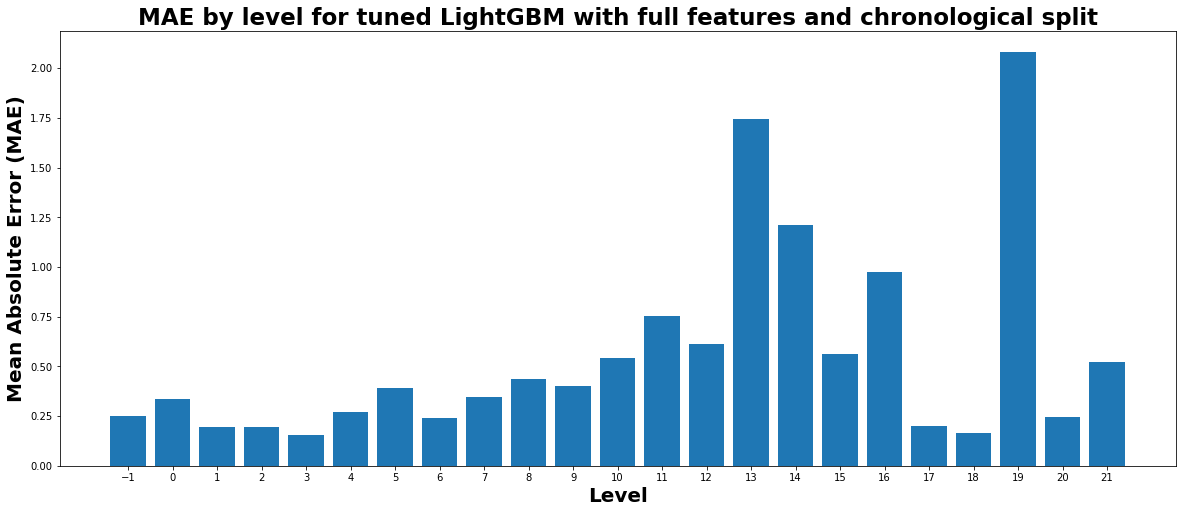

In [27]:
plot_mae_by_level(
    y_test,
    y_pred_test,
    title="MAE by level for tuned LightGBM with full features and chronological split",
)

In [28]:
predict = lgb_tuned.predict(X_test)
evaluate_round_predictions([0.5, 0.33, 0.45], y_test, predict)

Default:
RMSE: 0.68

Round type: 0.5
RMSE: 0.72

Round type: 0.33
RMSE: 0.70

Round type: 0.45
RMSE: 0.71



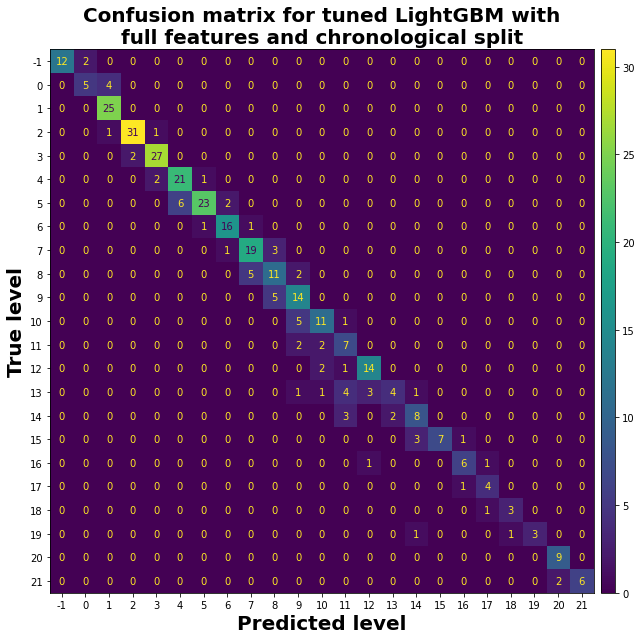

In [29]:
plot_confusion_matrix(
    predict,
    y_test,
    title="Confusion matrix for tuned LightGBM with\nfull features and chronological split",
)

## Random split

In [30]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error

lgb_train = lgb.Dataset(X_train_random_split, y_train_random_split)
lgb_eval = lgb.Dataset(X_test_random_split, y_test_random_split, reference=lgb_train)

params = {
    "boosting_type": "gbdt",
    "objective": "regression",
    "metric": {"l2", "l1"},
}

gbm = lgb.train(
    params,
    lgb_train,
    num_boost_round=100,
    valid_sets=lgb_eval,
    callbacks=[lgb.early_stopping(stopping_rounds=5)],
)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001235 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 804
[LightGBM] [Info] Number of data points in the train set: 904, number of used features: 48
[LightGBM] [Info] Start training from score 7.162611
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[75]	valid_0's l1: 0.246737	valid_0's l2: 0.1379


In [31]:
y_pred_train = gbm.predict(X_train_random_split, num_iteration=gbm.best_iteration)
y_pred_test = gbm.predict(X_test_random_split, num_iteration=gbm.best_iteration)

In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error


rmse = mean_squared_error(y_test_random_split, y_pred_test, squared=False)
mae = mean_absolute_error(y_test_random_split, y_pred_test)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

RMSE: 0.37
MAE: 0.25


In [33]:
results.loc[2] = ["random", "default", "full", rmse, mae]

###### MAE by level

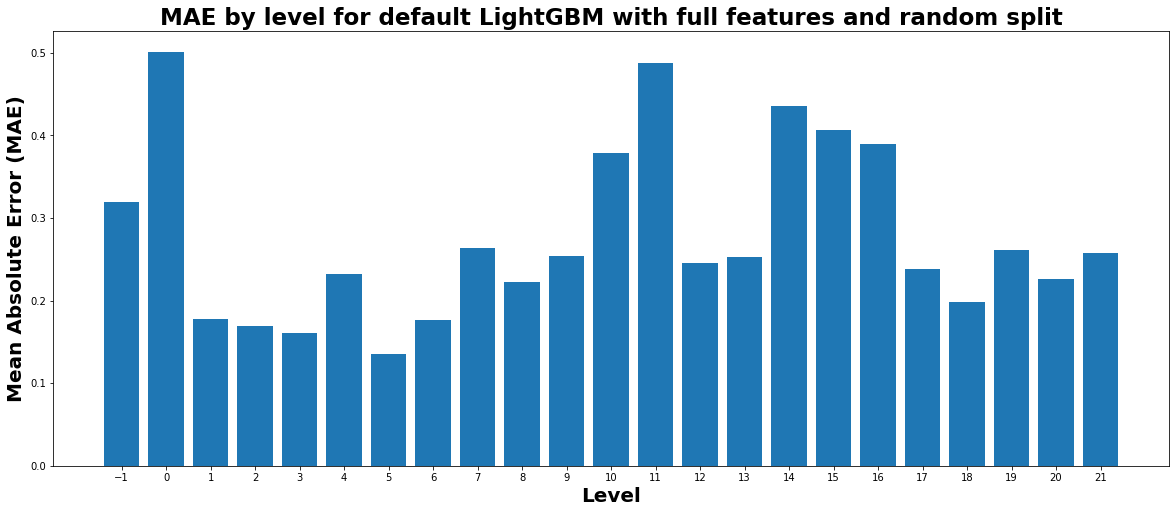

In [34]:
plot_mae_by_level(
    y_test_random_split,
    y_pred_test,
    title="MAE by level for default LightGBM with full features and random split",
)

In [35]:
evaluate_round_predictions([0.5, 0.33, 0.45], y_test_random_split, y_pred_test)

Default:
RMSE: 0.37

Round type: 0.5
RMSE: 0.38

Round type: 0.33
RMSE: 0.43

Round type: 0.45
RMSE: 0.38



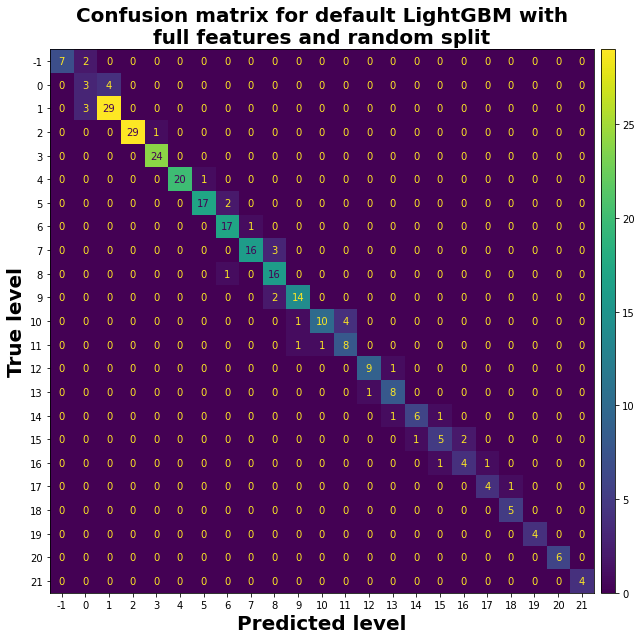

In [36]:
plot_confusion_matrix(
    y_pred_test,
    y_test_random_split,
    title="Confusion matrix for default LightGBM with\nfull features and random split",
)

### Tuning

In [37]:
import optuna.integration.lightgbm as lgb
from lightgbm import early_stopping
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold


lgb_train = lgb.Dataset(X_train_random_split, y_train_random_split)

params = {
    "boosting_type": "gbdt",
    "objective": "regression",
    "metric": "l2",
    "verbosity": -1,
}

tuner = lgb.LightGBMTunerCV(
    params,
    lgb_train,
    folds=KFold(n_splits=5),
    num_boost_round=10000,
    callbacks=[early_stopping(100), log_evaluation(100)],
)

tuner.run()

[I 2023-11-10 12:13:09,791] A new study created in memory with name: no-name-4eec59f9-77bd-4c49-8ca0-5efee5e50014
feature_fraction, val_score: inf:   0%|                                                          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	cv_agg's l2: 0.173359 + 0.0411901
[200]	cv_agg's l2: 0.169756 + 0.039742
[300]	cv_agg's l2: 0.168722 + 0.0391668
[400]	cv_agg's l2: 0.168476 + 0.0393062
[500]	cv_agg's l2: 0.168423 + 0.0391467


feature_fraction, val_score: 0.168344:  14%|######4                                      | 1/7 [00:03<00:22,  3.78s/it]

Early stopping, best iteration is:
[472]	cv_agg's l2: 0.168344 + 0.0392177
[100]	cv_agg's l2: 0.170201 + 0.0497742
[200]	cv_agg's l2: 0.166602 + 0.0471048
[300]	cv_agg's l2: 0.165874 + 0.0468602
[400]	cv_agg's l2: 0.165405 + 0.046238
[500]	cv_agg's l2: 0.165058 + 0.0457714
[600]	cv_agg's l2: 0.165087 + 0.0456621


feature_fraction, val_score: 0.165011:  29%|############8                                | 2/7 [00:09<00:24,  4.85s/it]

Early stopping, best iteration is:
[543]	cv_agg's l2: 0.165011 + 0.0457184
[100]	cv_agg's l2: 0.17067 + 0.0484906
[200]	cv_agg's l2: 0.167369 + 0.0466739
[300]	cv_agg's l2: 0.166322 + 0.0466153
[400]	cv_agg's l2: 0.166116 + 0.0462251
[500]	cv_agg's l2: 0.166084 + 0.04606
[600]	cv_agg's l2: 0.165933 + 0.0458746


feature_fraction, val_score: 0.165011:  43%|###################2                         | 3/7 [00:14<00:19,  4.86s/it]

Early stopping, best iteration is:
[543]	cv_agg's l2: 0.165011 + 0.0457184
[100]	cv_agg's l2: 0.165504 + 0.0452766
[200]	cv_agg's l2: 0.162282 + 0.0431373
[300]	cv_agg's l2: 0.161939 + 0.0414281
[400]	cv_agg's l2: 0.161225 + 0.0406967
[500]	cv_agg's l2: 0.160741 + 0.0401195


feature_fraction, val_score: 0.160685:  57%|#########################7                   | 4/7 [00:18<00:14,  4.73s/it]

Early stopping, best iteration is:
[493]	cv_agg's l2: 0.160685 + 0.0401396
[100]	cv_agg's l2: 0.171795 + 0.0493186
[200]	cv_agg's l2: 0.167808 + 0.0469403
[300]	cv_agg's l2: 0.166524 + 0.0459494
[400]	cv_agg's l2: 0.1664 + 0.0457052
[500]	cv_agg's l2: 0.166051 + 0.0452917


feature_fraction, val_score: 0.160685:  71%|################################1            | 5/7 [00:22<00:08,  4.44s/it]

Early stopping, best iteration is:
[493]	cv_agg's l2: 0.160685 + 0.0401396
[100]	cv_agg's l2: 0.152045 + 0.0348854
[200]	cv_agg's l2: 0.148446 + 0.0327369
[300]	cv_agg's l2: 0.146461 + 0.0322
[400]	cv_agg's l2: 0.146053 + 0.0312933
[500]	cv_agg's l2: 0.14555 + 0.0308671
[600]	cv_agg's l2: 0.145364 + 0.0306216
[700]	cv_agg's l2: 0.145313 + 0.0304239
[800]	cv_agg's l2: 0.145269 + 0.0303414
[900]	cv_agg's l2: 0.145244 + 0.03028
[1000]	cv_agg's l2: 0.145214 + 0.0302837
[1100]	cv_agg's l2: 0.145164 + 0.0302165


feature_fraction, val_score: 0.145156:  86%|######################################5      | 6/7 [00:30<00:05,  5.64s/it]

Early stopping, best iteration is:
[1082]	cv_agg's l2: 0.145156 + 0.0301886
[100]	cv_agg's l2: 0.157462 + 0.0455328
[200]	cv_agg's l2: 0.152357 + 0.0428452
[300]	cv_agg's l2: 0.15048 + 0.0413018
[400]	cv_agg's l2: 0.150009 + 0.041088
[500]	cv_agg's l2: 0.149624 + 0.0404743
[600]	cv_agg's l2: 0.14965 + 0.0403328
[700]	cv_agg's l2: 0.149555 + 0.0400863
[800]	cv_agg's l2: 0.149585 + 0.0401061
[900]	cv_agg's l2: 0.149547 + 0.0401433
[1000]	cv_agg's l2: 0.149544 + 0.0401693
[1100]	cv_agg's l2: 0.149488 + 0.0401171


feature_fraction, val_score: 0.145156: 100%|#############################################| 7/7 [00:39<00:00,  5.70s/it]


Early stopping, best iteration is:
[1082]	cv_agg's l2: 0.145156 + 0.0301886


num_leaves, val_score: 0.145156:   0%|                                                          | 0/20 [00:00<?, ?it/s]

[100]	cv_agg's l2: 0.152045 + 0.0348854
[200]	cv_agg's l2: 0.148446 + 0.0327369
[300]	cv_agg's l2: 0.146461 + 0.0322
[400]	cv_agg's l2: 0.146053 + 0.0312933
[500]	cv_agg's l2: 0.14555 + 0.0308671
[600]	cv_agg's l2: 0.145364 + 0.0306216
[700]	cv_agg's l2: 0.145313 + 0.0304239
[800]	cv_agg's l2: 0.145269 + 0.0303414
[900]	cv_agg's l2: 0.145244 + 0.03028
[1000]	cv_agg's l2: 0.145214 + 0.0302837
[1100]	cv_agg's l2: 0.145164 + 0.0302165


num_leaves, val_score: 0.145156:   5%|##5                                               | 1/20 [00:09<02:58,  9.40s/it]

Early stopping, best iteration is:
[1082]	cv_agg's l2: 0.145156 + 0.0301886
[100]	cv_agg's l2: 0.152045 + 0.0348854
[200]	cv_agg's l2: 0.148446 + 0.0327369
[300]	cv_agg's l2: 0.146461 + 0.0322
[400]	cv_agg's l2: 0.146053 + 0.0312933
[500]	cv_agg's l2: 0.14555 + 0.0308671
[600]	cv_agg's l2: 0.145364 + 0.0306216
[700]	cv_agg's l2: 0.145313 + 0.0304239
[800]	cv_agg's l2: 0.145269 + 0.0303414
[900]	cv_agg's l2: 0.145244 + 0.03028
[1000]	cv_agg's l2: 0.145214 + 0.0302837
[1100]	cv_agg's l2: 0.145164 + 0.0302165


num_leaves, val_score: 0.145156:  10%|#####                                             | 2/20 [00:18<02:40,  8.94s/it]

Early stopping, best iteration is:
[1082]	cv_agg's l2: 0.145156 + 0.0301886
[100]	cv_agg's l2: 0.152045 + 0.0348854
[200]	cv_agg's l2: 0.148446 + 0.0327369
[300]	cv_agg's l2: 0.146461 + 0.0322
[400]	cv_agg's l2: 0.146053 + 0.0312933
[500]	cv_agg's l2: 0.14555 + 0.0308671
[600]	cv_agg's l2: 0.145364 + 0.0306216
[700]	cv_agg's l2: 0.145313 + 0.0304239
[800]	cv_agg's l2: 0.145269 + 0.0303414
[900]	cv_agg's l2: 0.145244 + 0.03028
[1000]	cv_agg's l2: 0.145214 + 0.0302837
[1100]	cv_agg's l2: 0.145164 + 0.0302165


num_leaves, val_score: 0.145156:  15%|#######5                                          | 3/20 [00:26<02:26,  8.62s/it]

Early stopping, best iteration is:
[1082]	cv_agg's l2: 0.145156 + 0.0301886
[100]	cv_agg's l2: 0.205109 + 0.061742
[200]	cv_agg's l2: 0.179588 + 0.0523929
[300]	cv_agg's l2: 0.168199 + 0.0494628
[400]	cv_agg's l2: 0.162131 + 0.04606
[500]	cv_agg's l2: 0.158624 + 0.0447149
[600]	cv_agg's l2: 0.156272 + 0.0437694
[700]	cv_agg's l2: 0.15388 + 0.0436668
[800]	cv_agg's l2: 0.15187 + 0.0424642
[900]	cv_agg's l2: 0.149918 + 0.0417623
[1000]	cv_agg's l2: 0.148743 + 0.0412555


num_leaves, val_score: 0.145156:  15%|#######5                                          | 3/20 [00:29<02:26,  8.62s/it]

[1100]	cv_agg's l2: 0.147792 + 0.0402706
Early stopping, best iteration is:
[1082]	cv_agg's l2: 0.145156 + 0.0301886


num_leaves, val_score: 0.145156:  20%|##########                                        | 4/20 [00:29<01:41,  6.36s/it]

[100]	cv_agg's l2: 0.152045 + 0.0348854
[200]	cv_agg's l2: 0.148446 + 0.0327369
[300]	cv_agg's l2: 0.146461 + 0.0322
[400]	cv_agg's l2: 0.146053 + 0.0312933
[500]	cv_agg's l2: 0.14555 + 0.0308671
[600]	cv_agg's l2: 0.145364 + 0.0306216
[700]	cv_agg's l2: 0.145313 + 0.0304239
[800]	cv_agg's l2: 0.145269 + 0.0303414
[900]	cv_agg's l2: 0.145244 + 0.03028
[1000]	cv_agg's l2: 0.145214 + 0.0302837
[1100]	cv_agg's l2: 0.145164 + 0.0302165


num_leaves, val_score: 0.145156:  25%|############5                                     | 5/20 [00:38<01:50,  7.33s/it]

Early stopping, best iteration is:
[1082]	cv_agg's l2: 0.145156 + 0.0301886
[100]	cv_agg's l2: 0.152045 + 0.0348854
[200]	cv_agg's l2: 0.148446 + 0.0327369
[300]	cv_agg's l2: 0.146461 + 0.0322
[400]	cv_agg's l2: 0.146053 + 0.0312933
[500]	cv_agg's l2: 0.14555 + 0.0308671
[600]	cv_agg's l2: 0.145364 + 0.0306216
[700]	cv_agg's l2: 0.145313 + 0.0304239
[800]	cv_agg's l2: 0.145269 + 0.0303414
[900]	cv_agg's l2: 0.145244 + 0.03028
[1000]	cv_agg's l2: 0.145214 + 0.0302837
[1100]	cv_agg's l2: 0.145164 + 0.0302165


num_leaves, val_score: 0.145156:  30%|###############                                   | 6/20 [00:47<01:51,  7.95s/it]

Early stopping, best iteration is:
[1082]	cv_agg's l2: 0.145156 + 0.0301886
[100]	cv_agg's l2: 0.152045 + 0.0348854
[200]	cv_agg's l2: 0.148446 + 0.0327369
[300]	cv_agg's l2: 0.146461 + 0.0322
[400]	cv_agg's l2: 0.146053 + 0.0312933
[500]	cv_agg's l2: 0.14555 + 0.0308671
[600]	cv_agg's l2: 0.145364 + 0.0306216
[700]	cv_agg's l2: 0.145313 + 0.0304239
[800]	cv_agg's l2: 0.145269 + 0.0303414
[900]	cv_agg's l2: 0.145244 + 0.03028
[1000]	cv_agg's l2: 0.145214 + 0.0302837
[1100]	cv_agg's l2: 0.145164 + 0.0302165


num_leaves, val_score: 0.145156:  35%|#################5                                | 7/20 [00:56<01:47,  8.28s/it]

Early stopping, best iteration is:
[1082]	cv_agg's l2: 0.145156 + 0.0301886
[100]	cv_agg's l2: 0.152045 + 0.0348854
[200]	cv_agg's l2: 0.148446 + 0.0327369
[300]	cv_agg's l2: 0.146461 + 0.0322
[400]	cv_agg's l2: 0.146053 + 0.0312933
[500]	cv_agg's l2: 0.14555 + 0.0308671
[600]	cv_agg's l2: 0.145364 + 0.0306216
[700]	cv_agg's l2: 0.145313 + 0.0304239
[800]	cv_agg's l2: 0.145269 + 0.0303414
[900]	cv_agg's l2: 0.145244 + 0.03028
[1000]	cv_agg's l2: 0.145214 + 0.0302837
[1100]	cv_agg's l2: 0.145164 + 0.0302165


num_leaves, val_score: 0.145156:  40%|####################                              | 8/20 [01:04<01:39,  8.29s/it]

Early stopping, best iteration is:
[1082]	cv_agg's l2: 0.145156 + 0.0301886
[100]	cv_agg's l2: 0.152045 + 0.0348854
[200]	cv_agg's l2: 0.148446 + 0.0327369
[300]	cv_agg's l2: 0.146461 + 0.0322
[400]	cv_agg's l2: 0.146053 + 0.0312933
[500]	cv_agg's l2: 0.14555 + 0.0308671
[600]	cv_agg's l2: 0.145364 + 0.0306216
[700]	cv_agg's l2: 0.145313 + 0.0304239
[800]	cv_agg's l2: 0.145269 + 0.0303414
[900]	cv_agg's l2: 0.145244 + 0.03028
[1000]	cv_agg's l2: 0.145214 + 0.0302837
[1100]	cv_agg's l2: 0.145164 + 0.0302165


num_leaves, val_score: 0.145156:  45%|######################5                           | 9/20 [01:13<01:31,  8.36s/it]

Early stopping, best iteration is:
[1082]	cv_agg's l2: 0.145156 + 0.0301886
[100]	cv_agg's l2: 0.152045 + 0.0348854
[200]	cv_agg's l2: 0.148446 + 0.0327369
[300]	cv_agg's l2: 0.146461 + 0.0322
[400]	cv_agg's l2: 0.146053 + 0.0312933
[500]	cv_agg's l2: 0.14555 + 0.0308671
[600]	cv_agg's l2: 0.145364 + 0.0306216
[700]	cv_agg's l2: 0.145313 + 0.0304239
[800]	cv_agg's l2: 0.145269 + 0.0303414
[900]	cv_agg's l2: 0.145244 + 0.03028
[1000]	cv_agg's l2: 0.145214 + 0.0302837
[1100]	cv_agg's l2: 0.145164 + 0.0302165


num_leaves, val_score: 0.145156:  50%|########################5                        | 10/20 [01:21<01:23,  8.31s/it]

Early stopping, best iteration is:
[1082]	cv_agg's l2: 0.145156 + 0.0301886
[100]	cv_agg's l2: 0.152045 + 0.0348854
[200]	cv_agg's l2: 0.148446 + 0.0327369
[300]	cv_agg's l2: 0.146461 + 0.0322
[400]	cv_agg's l2: 0.146053 + 0.0312933
[500]	cv_agg's l2: 0.14555 + 0.0308671
[600]	cv_agg's l2: 0.145364 + 0.0306216
[700]	cv_agg's l2: 0.145313 + 0.0304239
[800]	cv_agg's l2: 0.145269 + 0.0303414
[900]	cv_agg's l2: 0.145244 + 0.03028
[1000]	cv_agg's l2: 0.145214 + 0.0302837
[1100]	cv_agg's l2: 0.145164 + 0.0302165


num_leaves, val_score: 0.145156:  55%|##########################9                      | 11/20 [01:30<01:16,  8.48s/it]

Early stopping, best iteration is:
[1082]	cv_agg's l2: 0.145156 + 0.0301886
[100]	cv_agg's l2: 0.152045 + 0.0348854
[200]	cv_agg's l2: 0.148446 + 0.0327369
[300]	cv_agg's l2: 0.146461 + 0.0322
[400]	cv_agg's l2: 0.146053 + 0.0312933
[500]	cv_agg's l2: 0.14555 + 0.0308671
[600]	cv_agg's l2: 0.145364 + 0.0306216
[700]	cv_agg's l2: 0.145313 + 0.0304239
[800]	cv_agg's l2: 0.145269 + 0.0303414
[900]	cv_agg's l2: 0.145244 + 0.03028
[1000]	cv_agg's l2: 0.145214 + 0.0302837
[1100]	cv_agg's l2: 0.145164 + 0.0302165


num_leaves, val_score: 0.145156:  60%|#############################4                   | 12/20 [01:38<01:08,  8.55s/it]

Early stopping, best iteration is:
[1082]	cv_agg's l2: 0.145156 + 0.0301886
[100]	cv_agg's l2: 0.18339 + 0.0502815
[200]	cv_agg's l2: 0.164954 + 0.0435404
[300]	cv_agg's l2: 0.157299 + 0.0405832
[400]	cv_agg's l2: 0.153499 + 0.0389681
[500]	cv_agg's l2: 0.151388 + 0.0385263
[600]	cv_agg's l2: 0.149783 + 0.0372874
[700]	cv_agg's l2: 0.148309 + 0.0368407
[800]	cv_agg's l2: 0.14738 + 0.0358534
[900]	cv_agg's l2: 0.146273 + 0.0343325
[1000]	cv_agg's l2: 0.1458 + 0.0339661
[1100]	cv_agg's l2: 0.145762 + 0.0332682
Early stopping, best iteration is:
[1082]	cv_agg's l2: 0.145156 + 0.0301886


num_leaves, val_score: 0.145156:  65%|###############################8                 | 13/20 [01:42<00:48,  6.92s/it]

[100]	cv_agg's l2: 0.152045 + 0.0348854
[200]	cv_agg's l2: 0.148446 + 0.0327369
[300]	cv_agg's l2: 0.146461 + 0.0322
[400]	cv_agg's l2: 0.146053 + 0.0312933
[500]	cv_agg's l2: 0.14555 + 0.0308671
[600]	cv_agg's l2: 0.145364 + 0.0306216
[700]	cv_agg's l2: 0.145313 + 0.0304239
[800]	cv_agg's l2: 0.145269 + 0.0303414
[900]	cv_agg's l2: 0.145244 + 0.03028
[1000]	cv_agg's l2: 0.145214 + 0.0302837
[1100]	cv_agg's l2: 0.145164 + 0.0302165


num_leaves, val_score: 0.145156:  70%|##################################3              | 14/20 [01:50<00:44,  7.38s/it]

Early stopping, best iteration is:
[1082]	cv_agg's l2: 0.145156 + 0.0301886
[100]	cv_agg's l2: 0.152045 + 0.0348854
[200]	cv_agg's l2: 0.148446 + 0.0327369
[300]	cv_agg's l2: 0.146461 + 0.0322
[400]	cv_agg's l2: 0.146053 + 0.0312933
[500]	cv_agg's l2: 0.14555 + 0.0308671
[600]	cv_agg's l2: 0.145364 + 0.0306216
[700]	cv_agg's l2: 0.145313 + 0.0304239
[800]	cv_agg's l2: 0.145269 + 0.0303414
[900]	cv_agg's l2: 0.145244 + 0.03028
[1000]	cv_agg's l2: 0.145214 + 0.0302837
[1100]	cv_agg's l2: 0.145164 + 0.0302165


num_leaves, val_score: 0.145156:  75%|####################################7            | 15/20 [01:59<00:39,  7.95s/it]

Early stopping, best iteration is:
[1082]	cv_agg's l2: 0.145156 + 0.0301886
[100]	cv_agg's l2: 0.152045 + 0.0348854
[200]	cv_agg's l2: 0.148446 + 0.0327369
[300]	cv_agg's l2: 0.146461 + 0.0322
[400]	cv_agg's l2: 0.146053 + 0.0312933
[500]	cv_agg's l2: 0.14555 + 0.0308671
[600]	cv_agg's l2: 0.145364 + 0.0306216
[700]	cv_agg's l2: 0.145313 + 0.0304239
[800]	cv_agg's l2: 0.145269 + 0.0303414
[900]	cv_agg's l2: 0.145244 + 0.03028
[1000]	cv_agg's l2: 0.145214 + 0.0302837
[1100]	cv_agg's l2: 0.145164 + 0.0302165


num_leaves, val_score: 0.145156:  80%|#######################################2         | 16/20 [02:08<00:32,  8.16s/it]

Early stopping, best iteration is:
[1082]	cv_agg's l2: 0.145156 + 0.0301886
[100]	cv_agg's l2: 0.152045 + 0.0348854
[200]	cv_agg's l2: 0.148446 + 0.0327369
[300]	cv_agg's l2: 0.146461 + 0.0322
[400]	cv_agg's l2: 0.146053 + 0.0312933
[500]	cv_agg's l2: 0.14555 + 0.0308671
[600]	cv_agg's l2: 0.145364 + 0.0306216
[700]	cv_agg's l2: 0.145313 + 0.0304239
[800]	cv_agg's l2: 0.145269 + 0.0303414
[900]	cv_agg's l2: 0.145244 + 0.03028
[1000]	cv_agg's l2: 0.145214 + 0.0302837
[1100]	cv_agg's l2: 0.145164 + 0.0302165


num_leaves, val_score: 0.145156:  85%|#########################################6       | 17/20 [02:17<00:25,  8.43s/it]

Early stopping, best iteration is:
[1082]	cv_agg's l2: 0.145156 + 0.0301886
[100]	cv_agg's l2: 0.152045 + 0.0348854
[200]	cv_agg's l2: 0.148446 + 0.0327369
[300]	cv_agg's l2: 0.146461 + 0.0322
[400]	cv_agg's l2: 0.146053 + 0.0312933
[500]	cv_agg's l2: 0.14555 + 0.0308671
[600]	cv_agg's l2: 0.145364 + 0.0306216
[700]	cv_agg's l2: 0.145313 + 0.0304239
[800]	cv_agg's l2: 0.145269 + 0.0303414
[900]	cv_agg's l2: 0.145244 + 0.03028
[1000]	cv_agg's l2: 0.145214 + 0.0302837
[1100]	cv_agg's l2: 0.145164 + 0.0302165


num_leaves, val_score: 0.145156:  90%|############################################1    | 18/20 [02:25<00:16,  8.42s/it]

Early stopping, best iteration is:
[1082]	cv_agg's l2: 0.145156 + 0.0301886
[100]	cv_agg's l2: 0.152045 + 0.0348854
[200]	cv_agg's l2: 0.148446 + 0.0327369
[300]	cv_agg's l2: 0.146461 + 0.0322
[400]	cv_agg's l2: 0.146053 + 0.0312933
[500]	cv_agg's l2: 0.14555 + 0.0308671
[600]	cv_agg's l2: 0.145364 + 0.0306216
[700]	cv_agg's l2: 0.145313 + 0.0304239
[800]	cv_agg's l2: 0.145269 + 0.0303414
[900]	cv_agg's l2: 0.145244 + 0.03028
[1000]	cv_agg's l2: 0.145214 + 0.0302837
[1100]	cv_agg's l2: 0.145164 + 0.0302165


num_leaves, val_score: 0.145156:  95%|##############################################5  | 19/20 [02:34<00:08,  8.60s/it]

Early stopping, best iteration is:
[1082]	cv_agg's l2: 0.145156 + 0.0301886
[100]	cv_agg's l2: 0.152045 + 0.0348854
[200]	cv_agg's l2: 0.148446 + 0.0327369
[300]	cv_agg's l2: 0.146461 + 0.0322
[400]	cv_agg's l2: 0.146053 + 0.0312933
[500]	cv_agg's l2: 0.14555 + 0.0308671
[600]	cv_agg's l2: 0.145364 + 0.0306216
[700]	cv_agg's l2: 0.145313 + 0.0304239
[800]	cv_agg's l2: 0.145269 + 0.0303414
[900]	cv_agg's l2: 0.145244 + 0.03028
[1000]	cv_agg's l2: 0.145214 + 0.0302837
[1100]	cv_agg's l2: 0.145164 + 0.0302165


num_leaves, val_score: 0.145156: 100%|#################################################| 20/20 [02:44<00:00,  8.20s/it]


Early stopping, best iteration is:
[1082]	cv_agg's l2: 0.145156 + 0.0301886


bagging, val_score: 0.145156:   0%|                                                             | 0/10 [00:00<?, ?it/s]

[100]	cv_agg's l2: 0.156225 + 0.0415041
[200]	cv_agg's l2: 0.149011 + 0.0385505
[300]	cv_agg's l2: 0.147173 + 0.037577
[400]	cv_agg's l2: 0.147201 + 0.0371901
[500]	cv_agg's l2: 0.14705 + 0.0364692
[600]	cv_agg's l2: 0.146861 + 0.0364567
[700]	cv_agg's l2: 0.147035 + 0.0364055
[800]	cv_agg's l2: 0.147094 + 0.0363621
[900]	cv_agg's l2: 0.147049 + 0.0363121
[1000]	cv_agg's l2: 0.146985 + 0.0361321
[1100]	cv_agg's l2: 0.14705 + 0.0361436


bagging, val_score: 0.145156:  10%|#####3                                               | 1/10 [00:08<01:14,  8.23s/it]

Early stopping, best iteration is:
[1082]	cv_agg's l2: 0.145156 + 0.0301886
[100]	cv_agg's l2: 0.194865 + 0.0305215
[200]	cv_agg's l2: 0.1822 + 0.0342771
[300]	cv_agg's l2: 0.179097 + 0.0303773
[400]	cv_agg's l2: 0.174707 + 0.0289921
[500]	cv_agg's l2: 0.172902 + 0.0277628
[600]	cv_agg's l2: 0.17267 + 0.0252816
[700]	cv_agg's l2: 0.172181 + 0.024635
[800]	cv_agg's l2: 0.173423 + 0.0255704
[900]	cv_agg's l2: 0.172729 + 0.0259618
[1000]	cv_agg's l2: 0.174836 + 0.0247279
[1100]	cv_agg's l2: 0.175741 + 0.0242407


bagging, val_score: 0.145156:  20%|##########6                                          | 2/10 [00:13<00:52,  6.58s/it]

Early stopping, best iteration is:
[1082]	cv_agg's l2: 0.145156 + 0.0301886
[100]	cv_agg's l2: 0.153153 + 0.0332231
[200]	cv_agg's l2: 0.148439 + 0.0315042
[300]	cv_agg's l2: 0.147857 + 0.031058
[400]	cv_agg's l2: 0.147263 + 0.0308592
[500]	cv_agg's l2: 0.146961 + 0.030803
[600]	cv_agg's l2: 0.146763 + 0.0305571
[700]	cv_agg's l2: 0.146705 + 0.0304278
[800]	cv_agg's l2: 0.14668 + 0.0303922
[900]	cv_agg's l2: 0.146651 + 0.0302988
[1000]	cv_agg's l2: 0.146623 + 0.0302081
[1100]	cv_agg's l2: 0.146598 + 0.0301625


bagging, val_score: 0.145156:  30%|###############9                                     | 3/10 [00:22<00:54,  7.75s/it]

Early stopping, best iteration is:
[1082]	cv_agg's l2: 0.145156 + 0.0301886
[100]	cv_agg's l2: 0.183151 + 0.031197
[200]	cv_agg's l2: 0.171218 + 0.0292494
[300]	cv_agg's l2: 0.166377 + 0.0284925
[400]	cv_agg's l2: 0.164207 + 0.0270734
[500]	cv_agg's l2: 0.165021 + 0.0268264
[600]	cv_agg's l2: 0.16343 + 0.0271919
[700]	cv_agg's l2: 0.162594 + 0.0270463
[800]	cv_agg's l2: 0.16256 + 0.0280172
[900]	cv_agg's l2: 0.162278 + 0.0280732
[1000]	cv_agg's l2: 0.162524 + 0.0289504
[1100]	cv_agg's l2: 0.16298 + 0.029507


bagging, val_score: 0.145156:  40%|#####################2                               | 4/10 [00:28<00:41,  6.98s/it]

Early stopping, best iteration is:
[1082]	cv_agg's l2: 0.145156 + 0.0301886
[100]	cv_agg's l2: 0.161688 + 0.0399828
[200]	cv_agg's l2: 0.153911 + 0.0364135
[300]	cv_agg's l2: 0.15241 + 0.0356084
[400]	cv_agg's l2: 0.151358 + 0.0344885
[500]	cv_agg's l2: 0.150887 + 0.0337523
[600]	cv_agg's l2: 0.15069 + 0.0336295
[700]	cv_agg's l2: 0.150391 + 0.0334061
[800]	cv_agg's l2: 0.150493 + 0.0335785
[900]	cv_agg's l2: 0.150404 + 0.0337691
[1000]	cv_agg's l2: 0.150301 + 0.0337567
[1100]	cv_agg's l2: 0.150321 + 0.0337917


bagging, val_score: 0.145156:  50%|##########################5                          | 5/10 [00:35<00:35,  7.04s/it]

Early stopping, best iteration is:
[1082]	cv_agg's l2: 0.145156 + 0.0301886
[100]	cv_agg's l2: 0.220221 + 0.041443
[200]	cv_agg's l2: 0.205951 + 0.0324697
[300]	cv_agg's l2: 0.20004 + 0.0266374
[400]	cv_agg's l2: 0.196798 + 0.0200157
[500]	cv_agg's l2: 0.19686 + 0.0215492
[600]	cv_agg's l2: 0.193902 + 0.0206501
[700]	cv_agg's l2: 0.190073 + 0.019357
[800]	cv_agg's l2: 0.1885 + 0.0179688
[900]	cv_agg's l2: 0.187908 + 0.0178158
[1000]	cv_agg's l2: 0.187864 + 0.0154222
[1100]	cv_agg's l2: 0.188385 + 0.0149647


bagging, val_score: 0.145156:  60%|###############################8                     | 6/10 [00:40<00:24,  6.18s/it]

Early stopping, best iteration is:
[1082]	cv_agg's l2: 0.145156 + 0.0301886
[100]	cv_agg's l2: 0.15889 + 0.0406952
[200]	cv_agg's l2: 0.149526 + 0.0361902
[300]	cv_agg's l2: 0.147963 + 0.0351937
[400]	cv_agg's l2: 0.146843 + 0.0340794
[500]	cv_agg's l2: 0.146843 + 0.033801
[600]	cv_agg's l2: 0.147011 + 0.0332926
[700]	cv_agg's l2: 0.147155 + 0.0333901
[800]	cv_agg's l2: 0.147171 + 0.0334468
[900]	cv_agg's l2: 0.147101 + 0.0334553
[1000]	cv_agg's l2: 0.147197 + 0.0335014
[1100]	cv_agg's l2: 0.14715 + 0.0335027


bagging, val_score: 0.145156:  70%|#####################################                | 7/10 [00:47<00:19,  6.50s/it]

Early stopping, best iteration is:
[1082]	cv_agg's l2: 0.145156 + 0.0301886
[100]	cv_agg's l2: 0.178632 + 0.0453297
[200]	cv_agg's l2: 0.168 + 0.041283
[300]	cv_agg's l2: 0.161992 + 0.0376698
[400]	cv_agg's l2: 0.160492 + 0.0379145
[500]	cv_agg's l2: 0.160167 + 0.0380987
[600]	cv_agg's l2: 0.159296 + 0.036578
[700]	cv_agg's l2: 0.159182 + 0.0364987
[800]	cv_agg's l2: 0.159 + 0.036639
[900]	cv_agg's l2: 0.159105 + 0.0366511
[1000]	cv_agg's l2: 0.15891 + 0.0366849
[1100]	cv_agg's l2: 0.158748 + 0.0364293


bagging, val_score: 0.145156:  80%|##########################################4          | 8/10 [00:53<00:12,  6.35s/it]

Early stopping, best iteration is:
[1082]	cv_agg's l2: 0.145156 + 0.0301886
[100]	cv_agg's l2: 0.157119 + 0.0331851
[200]	cv_agg's l2: 0.149414 + 0.0291366
[300]	cv_agg's l2: 0.14708 + 0.0274403
[400]	cv_agg's l2: 0.146401 + 0.0271571
[500]	cv_agg's l2: 0.146379 + 0.0271153
[600]	cv_agg's l2: 0.146226 + 0.0266857
[700]	cv_agg's l2: 0.146008 + 0.0264209
[800]	cv_agg's l2: 0.146189 + 0.0264899
[900]	cv_agg's l2: 0.145897 + 0.0263385
[1000]	cv_agg's l2: 0.146117 + 0.0264685
[1100]	cv_agg's l2: 0.146029 + 0.0264136


bagging, val_score: 0.145156:  90%|###############################################7     | 9/10 [01:01<00:06,  6.80s/it]

Early stopping, best iteration is:
[1082]	cv_agg's l2: 0.145156 + 0.0301886
[100]	cv_agg's l2: 0.153879 + 0.0340696
[200]	cv_agg's l2: 0.149007 + 0.0328659
[300]	cv_agg's l2: 0.147076 + 0.032554
[400]	cv_agg's l2: 0.14632 + 0.0322191
[500]	cv_agg's l2: 0.146127 + 0.0318558
[600]	cv_agg's l2: 0.145926 + 0.0319444
[700]	cv_agg's l2: 0.145872 + 0.031738
[800]	cv_agg's l2: 0.145768 + 0.03164
[900]	cv_agg's l2: 0.145724 + 0.0316241
[1000]	cv_agg's l2: 0.145773 + 0.0316016
[1100]	cv_agg's l2: 0.145777 + 0.0315548


bagging, val_score: 0.145156: 100%|####################################################| 10/10 [01:10<00:00,  7.00s/it]


Early stopping, best iteration is:
[1082]	cv_agg's l2: 0.145156 + 0.0301886


feature_fraction_stage2, val_score: 0.145156:   0%|                                              | 0/3 [00:00<?, ?it/s]

[100]	cv_agg's l2: 0.157565 + 0.0413874
[200]	cv_agg's l2: 0.154093 + 0.0394549
[300]	cv_agg's l2: 0.152655 + 0.0378647
[400]	cv_agg's l2: 0.15198 + 0.036919
[500]	cv_agg's l2: 0.151546 + 0.036341
[600]	cv_agg's l2: 0.151406 + 0.0361148
[700]	cv_agg's l2: 0.151325 + 0.0360085
[800]	cv_agg's l2: 0.151313 + 0.0359611
[900]	cv_agg's l2: 0.151274 + 0.0359254
[1000]	cv_agg's l2: 0.151265 + 0.0359133
[1100]	cv_agg's l2: 0.151252 + 0.0358455


feature_fraction_stage2, val_score: 0.145156:  33%|############6                         | 1/3 [00:09<00:18,  9.12s/it]

Early stopping, best iteration is:
[1082]	cv_agg's l2: 0.145156 + 0.0301886
[100]	cv_agg's l2: 0.160065 + 0.0450887
[200]	cv_agg's l2: 0.155546 + 0.043486
[300]	cv_agg's l2: 0.153561 + 0.0422342
[400]	cv_agg's l2: 0.153016 + 0.0416454
[500]	cv_agg's l2: 0.152552 + 0.0412749
[600]	cv_agg's l2: 0.152429 + 0.0410127
[700]	cv_agg's l2: 0.152411 + 0.0407798
[800]	cv_agg's l2: 0.152304 + 0.0406825
[900]	cv_agg's l2: 0.152247 + 0.0405972
[1000]	cv_agg's l2: 0.152186 + 0.0405482
[1100]	cv_agg's l2: 0.152167 + 0.0405083


feature_fraction_stage2, val_score: 0.145156:  67%|#########################3            | 2/3 [00:18<00:09,  9.35s/it]

Early stopping, best iteration is:
[1082]	cv_agg's l2: 0.145156 + 0.0301886
[100]	cv_agg's l2: 0.152299 + 0.03863
[200]	cv_agg's l2: 0.147169 + 0.0361424
[300]	cv_agg's l2: 0.145432 + 0.035461
[400]	cv_agg's l2: 0.144642 + 0.0344903
[500]	cv_agg's l2: 0.144455 + 0.034101


feature_fraction_stage2, val_score: 0.144357: 100%|######################################| 3/3 [00:23<00:00,  7.75s/it]


Early stopping, best iteration is:
[448]	cv_agg's l2: 0.144357 + 0.0342619


regularization_factors, val_score: 0.144357:   0%|                                              | 0/20 [00:00<?, ?it/s]

[100]	cv_agg's l2: 0.153528 + 0.0384319
[200]	cv_agg's l2: 0.147401 + 0.0362141
[300]	cv_agg's l2: 0.145923 + 0.0354545
[400]	cv_agg's l2: 0.144916 + 0.0345485
[500]	cv_agg's l2: 0.144663 + 0.0340787


regularization_factors, val_score: 0.144357:   5%|#9                                    | 1/20 [00:04<01:16,  4.02s/it]

Early stopping, best iteration is:
[448]	cv_agg's l2: 0.144357 + 0.0342619
[100]	cv_agg's l2: 0.153021 + 0.0384947
[200]	cv_agg's l2: 0.147618 + 0.0362146
[300]	cv_agg's l2: 0.146113 + 0.0354559
[400]	cv_agg's l2: 0.145108 + 0.0345493
[500]	cv_agg's l2: 0.144929 + 0.03408


regularization_factors, val_score: 0.144357:  10%|###8                                  | 2/20 [00:07<01:10,  3.93s/it]

Early stopping, best iteration is:
[448]	cv_agg's l2: 0.144357 + 0.0342619
[100]	cv_agg's l2: 0.154156 + 0.0383911
[200]	cv_agg's l2: 0.148594 + 0.0362588
[300]	cv_agg's l2: 0.147006 + 0.0355298
[400]	cv_agg's l2: 0.146277 + 0.034635
[500]	cv_agg's l2: 0.145978 + 0.0341386


regularization_factors, val_score: 0.144357:  15%|#####7                                | 3/20 [00:11<01:06,  3.90s/it]

Early stopping, best iteration is:
[448]	cv_agg's l2: 0.144357 + 0.0342619
[100]	cv_agg's l2: 0.1534 + 0.0381772
[200]	cv_agg's l2: 0.147946 + 0.0355897
[300]	cv_agg's l2: 0.146093 + 0.0347724
[400]	cv_agg's l2: 0.145338 + 0.0344073
[500]	cv_agg's l2: 0.144985 + 0.0339754


regularization_factors, val_score: 0.144357:  20%|#######6                              | 4/20 [00:15<01:01,  3.87s/it]

Early stopping, best iteration is:
[448]	cv_agg's l2: 0.144357 + 0.0342619
[100]	cv_agg's l2: 0.153108 + 0.0361609
[200]	cv_agg's l2: 0.147629 + 0.0346058
[300]	cv_agg's l2: 0.145728 + 0.0336751
[400]	cv_agg's l2: 0.145201 + 0.0332897
[500]	cv_agg's l2: 0.145006 + 0.0329587


regularization_factors, val_score: 0.144357:  25%|#########5                            | 5/20 [00:19<00:58,  3.87s/it]

Early stopping, best iteration is:
[448]	cv_agg's l2: 0.144357 + 0.0342619
[100]	cv_agg's l2: 0.153156 + 0.0385172
[200]	cv_agg's l2: 0.148832 + 0.0359983
[300]	cv_agg's l2: 0.147486 + 0.0344017
[400]	cv_agg's l2: 0.14661 + 0.0335519
[500]	cv_agg's l2: 0.146011 + 0.0331248


regularization_factors, val_score: 0.144357:  30%|###########4                          | 6/20 [00:23<00:53,  3.85s/it]

Early stopping, best iteration is:
[448]	cv_agg's l2: 0.144357 + 0.0342619
[100]	cv_agg's l2: 0.152486 + 0.0376644
[200]	cv_agg's l2: 0.147797 + 0.0353553
[300]	cv_agg's l2: 0.146139 + 0.0342103
[400]	cv_agg's l2: 0.145367 + 0.0337896
[500]	cv_agg's l2: 0.144743 + 0.0335104


regularization_factors, val_score: 0.144357:  35%|#############3                        | 7/20 [00:27<00:50,  3.86s/it]

Early stopping, best iteration is:
[448]	cv_agg's l2: 0.144357 + 0.0342619
[100]	cv_agg's l2: 0.153422 + 0.0384428
[200]	cv_agg's l2: 0.147798 + 0.0358226
[300]	cv_agg's l2: 0.146377 + 0.0347067
[400]	cv_agg's l2: 0.145319 + 0.0338774
[500]	cv_agg's l2: 0.145059 + 0.0335878


regularization_factors, val_score: 0.144357:  40%|###############2                      | 8/20 [00:31<00:46,  3.88s/it]

Early stopping, best iteration is:
[448]	cv_agg's l2: 0.144357 + 0.0342619
[100]	cv_agg's l2: 0.153921 + 0.0372513
[200]	cv_agg's l2: 0.148679 + 0.0351316
[300]	cv_agg's l2: 0.146961 + 0.0345936
[400]	cv_agg's l2: 0.146318 + 0.0338812
[500]	cv_agg's l2: 0.145925 + 0.0334717


regularization_factors, val_score: 0.144357:  45%|#################1                    | 9/20 [00:34<00:42,  3.86s/it]

Early stopping, best iteration is:
[448]	cv_agg's l2: 0.144357 + 0.0342619
[100]	cv_agg's l2: 0.153958 + 0.0395749
[200]	cv_agg's l2: 0.149395 + 0.0360828
[300]	cv_agg's l2: 0.147556 + 0.0359163
[400]	cv_agg's l2: 0.147053 + 0.0353783
[500]	cv_agg's l2: 0.14673 + 0.0350564


regularization_factors, val_score: 0.144357:  50%|##################5                  | 10/20 [00:39<00:39,  3.99s/it]

Early stopping, best iteration is:
[448]	cv_agg's l2: 0.144357 + 0.0342619
[100]	cv_agg's l2: 0.153422 + 0.0384428
[200]	cv_agg's l2: 0.147798 + 0.0358226
[300]	cv_agg's l2: 0.146377 + 0.0347067
[400]	cv_agg's l2: 0.145319 + 0.0338774
[500]	cv_agg's l2: 0.145059 + 0.0335878


regularization_factors, val_score: 0.144357:  55%|####################3                | 11/20 [00:43<00:36,  4.01s/it]

Early stopping, best iteration is:
[448]	cv_agg's l2: 0.144357 + 0.0342619
[100]	cv_agg's l2: 0.152486 + 0.0376644
[200]	cv_agg's l2: 0.147729 + 0.0352298
[300]	cv_agg's l2: 0.146207 + 0.0340301
[400]	cv_agg's l2: 0.145423 + 0.0336141
[500]	cv_agg's l2: 0.145056 + 0.0332152


regularization_factors, val_score: 0.144357:  60%|######################2              | 12/20 [00:48<00:34,  4.25s/it]

Early stopping, best iteration is:
[448]	cv_agg's l2: 0.144357 + 0.0342619
[100]	cv_agg's l2: 0.188597 + 0.053198
[200]	cv_agg's l2: 0.184103 + 0.0527056
[300]	cv_agg's l2: 0.184098 + 0.0527015
[400]	cv_agg's l2: 0.184098 + 0.0527013


regularization_factors, val_score: 0.144357:  65%|########################             | 13/20 [00:49<00:24,  3.43s/it]

[500]	cv_agg's l2: 0.184098 + 0.0527013
Early stopping, best iteration is:
[448]	cv_agg's l2: 0.144357 + 0.0342619
[100]	cv_agg's l2: 0.152486 + 0.0376644
[200]	cv_agg's l2: 0.147105 + 0.035623
[300]	cv_agg's l2: 0.145313 + 0.0347352
[400]	cv_agg's l2: 0.144662 + 0.0343529
[500]	cv_agg's l2: 0.144091 + 0.0339183
[600]	cv_agg's l2: 0.143741 + 0.0336497
[700]	cv_agg's l2: 0.143594 + 0.0335679
[800]	cv_agg's l2: 0.143585 + 0.0334986
[900]	cv_agg's l2: 0.143533 + 0.0334562


regularization_factors, val_score: 0.143490:  70%|#########################9           | 14/20 [00:56<00:27,  4.53s/it]

Early stopping, best iteration is:
[878]	cv_agg's l2: 0.14349 + 0.0334171
[100]	cv_agg's l2: 0.152626 + 0.0364808
[200]	cv_agg's l2: 0.147596 + 0.034675
[300]	cv_agg's l2: 0.146512 + 0.0337213
[400]	cv_agg's l2: 0.145934 + 0.0330179
[500]	cv_agg's l2: 0.145777 + 0.0328254
[600]	cv_agg's l2: 0.145602 + 0.0326198
[700]	cv_agg's l2: 0.14553 + 0.0324686
[800]	cv_agg's l2: 0.145467 + 0.0324539
[900]	cv_agg's l2: 0.145385 + 0.0323841


regularization_factors, val_score: 0.143490:  75%|###########################7         | 15/20 [01:03<00:26,  5.31s/it]

Early stopping, best iteration is:
[878]	cv_agg's l2: 0.14349 + 0.0334171
[100]	cv_agg's l2: 0.154158 + 0.038391
[200]	cv_agg's l2: 0.148696 + 0.0361702
[300]	cv_agg's l2: 0.147084 + 0.0355241
[400]	cv_agg's l2: 0.146206 + 0.034624
[500]	cv_agg's l2: 0.14582 + 0.0343481
[600]	cv_agg's l2: 0.145541 + 0.034074
[700]	cv_agg's l2: 0.145337 + 0.0338764
[800]	cv_agg's l2: 0.145259 + 0.0337175
[900]	cv_agg's l2: 0.145251 + 0.0336631


regularization_factors, val_score: 0.143490:  80%|#############################6       | 16/20 [01:10<00:23,  5.85s/it]

Early stopping, best iteration is:
[878]	cv_agg's l2: 0.14349 + 0.0334171
[100]	cv_agg's l2: 0.152952 + 0.0372743
[200]	cv_agg's l2: 0.147732 + 0.0343791
[300]	cv_agg's l2: 0.146042 + 0.032798
[400]	cv_agg's l2: 0.145192 + 0.0325
[500]	cv_agg's l2: 0.144777 + 0.0322387
[600]	cv_agg's l2: 0.144433 + 0.031842
[700]	cv_agg's l2: 0.144213 + 0.031579
[800]	cv_agg's l2: 0.144187 + 0.0314372
[900]	cv_agg's l2: 0.144117 + 0.0313085


regularization_factors, val_score: 0.143490:  85%|###############################4     | 17/20 [01:18<00:18,  6.31s/it]

Early stopping, best iteration is:
[878]	cv_agg's l2: 0.14349 + 0.0334171
[100]	cv_agg's l2: 0.15255 + 0.0373227
[200]	cv_agg's l2: 0.14724 + 0.0339406
[300]	cv_agg's l2: 0.145539 + 0.0329378
[400]	cv_agg's l2: 0.144688 + 0.0322667
[500]	cv_agg's l2: 0.144424 + 0.0318889
[600]	cv_agg's l2: 0.144278 + 0.0315592
[700]	cv_agg's l2: 0.144018 + 0.031219
[800]	cv_agg's l2: 0.143926 + 0.0312014
[900]	cv_agg's l2: 0.143908 + 0.0311953


regularization_factors, val_score: 0.143490:  90%|#################################3   | 18/20 [01:25<00:12,  6.48s/it]

Early stopping, best iteration is:
[878]	cv_agg's l2: 0.14349 + 0.0334171
[100]	cv_agg's l2: 0.152486 + 0.0376644
[200]	cv_agg's l2: 0.147105 + 0.035623
[300]	cv_agg's l2: 0.145313 + 0.0347352
[400]	cv_agg's l2: 0.144662 + 0.0343529
[500]	cv_agg's l2: 0.144116 + 0.033963
[600]	cv_agg's l2: 0.14372 + 0.0336103
[700]	cv_agg's l2: 0.143551 + 0.0334902
[800]	cv_agg's l2: 0.143565 + 0.0333826
[900]	cv_agg's l2: 0.143517 + 0.0333009


regularization_factors, val_score: 0.143469:  95%|###################################1 | 19/20 [01:32<00:06,  6.81s/it]

Early stopping, best iteration is:
[870]	cv_agg's l2: 0.143469 + 0.0332806
[100]	cv_agg's l2: 0.152952 + 0.0372743
[200]	cv_agg's l2: 0.147732 + 0.0343791
[300]	cv_agg's l2: 0.145917 + 0.0329073
[400]	cv_agg's l2: 0.145215 + 0.0323034
[500]	cv_agg's l2: 0.144653 + 0.0318198
[600]	cv_agg's l2: 0.144274 + 0.0314525
[700]	cv_agg's l2: 0.144179 + 0.0313707
[800]	cv_agg's l2: 0.144087 + 0.0311201
[900]	cv_agg's l2: 0.143995 + 0.0310531


regularization_factors, val_score: 0.143469: 100%|#####################################| 20/20 [01:39<00:00,  5.00s/it]


Early stopping, best iteration is:
[870]	cv_agg's l2: 0.143469 + 0.0332806


min_data_in_leaf, val_score: 0.143469:   0%|                                                     | 0/5 [00:00<?, ?it/s]

[100]	cv_agg's l2: 0.145009 + 0.0306444
[200]	cv_agg's l2: 0.142314 + 0.0303897
[300]	cv_agg's l2: 0.141741 + 0.0298026
[400]	cv_agg's l2: 0.141319 + 0.0295231
[500]	cv_agg's l2: 0.141273 + 0.0294789
[600]	cv_agg's l2: 0.141235 + 0.0294133


min_data_in_leaf, val_score: 0.141231:  20%|#########                                    | 1/5 [00:05<00:20,  5.00s/it]

Early stopping, best iteration is:
[598]	cv_agg's l2: 0.141231 + 0.0294087
[100]	cv_agg's l2: 0.22902 + 0.0460431
[200]	cv_agg's l2: 0.218956 + 0.0399012
[300]	cv_agg's l2: 0.216371 + 0.0405941
[400]	cv_agg's l2: 0.215759 + 0.0390634
[500]	cv_agg's l2: 0.215844 + 0.037502
[600]	cv_agg's l2: 0.216415 + 0.0369063


min_data_in_leaf, val_score: 0.141231:  40%|##################                           | 2/5 [00:08<00:11,  3.89s/it]

Early stopping, best iteration is:
[598]	cv_agg's l2: 0.141231 + 0.0294087
[100]	cv_agg's l2: 0.158711 + 0.0375026
[200]	cv_agg's l2: 0.152997 + 0.0326887
[300]	cv_agg's l2: 0.150692 + 0.0315875
[400]	cv_agg's l2: 0.149503 + 0.0302876
[500]	cv_agg's l2: 0.148895 + 0.0299696
[600]	cv_agg's l2: 0.148919 + 0.0297295


min_data_in_leaf, val_score: 0.141231:  60%|###########################                  | 3/5 [00:12<00:08,  4.14s/it]

Early stopping, best iteration is:
[598]	cv_agg's l2: 0.141231 + 0.0294087
[100]	cv_agg's l2: 0.693818 + 0.0636843
[200]	cv_agg's l2: 0.658629 + 0.0531309
[300]	cv_agg's l2: 0.640014 + 0.0542277
[400]	cv_agg's l2: 0.625227 + 0.0567111
[500]	cv_agg's l2: 0.615698 + 0.062106
[600]	cv_agg's l2: 0.61199 + 0.0651285


min_data_in_leaf, val_score: 0.141231:  80%|####################################         | 4/5 [00:14<00:03,  3.20s/it]

Early stopping, best iteration is:
[598]	cv_agg's l2: 0.141231 + 0.0294087
[100]	cv_agg's l2: 0.146461 + 0.0365789
[200]	cv_agg's l2: 0.144579 + 0.0361231
[300]	cv_agg's l2: 0.144434 + 0.0355959
[400]	cv_agg's l2: 0.144317 + 0.0354391
[500]	cv_agg's l2: 0.144248 + 0.0353702
[600]	cv_agg's l2: 0.144221 + 0.0353258


min_data_in_leaf, val_score: 0.141231: 100%|#############################################| 5/5 [00:19<00:00,  3.92s/it]

Early stopping, best iteration is:
[598]	cv_agg's l2: 0.141231 + 0.0294087


In [38]:
print(f"Best score: {tuner.best_score}")
best_params = tuner.best_params
print("Params: ")
for key, value in best_params.items():
    print("    {}: {}".format(key, value))

Best score: 0.14123058749966586
Params: 
    boosting_type: gbdt
    objective: regression
    metric: l2
    verbosity: -1
    feature_pre_filter: False
    lambda_l1: 4.747763894433127e-05
    lambda_l2: 5.272743257851296e-06
    num_leaves: 31
    feature_fraction: 0.41600000000000004
    bagging_fraction: 1.0
    bagging_freq: 0
    min_child_samples: 10


In [39]:
import lightgbm as lgb

lgb_tuned = lgb.train(
    best_params,
    lgb_train,
    num_boost_round=10000,
)

In [40]:
rmse, mae = assess_regression_model(
    lgb_tuned,
    X_train_random_split,
    X_test_random_split,
    y_train_random_split,
    y_test_random_split,
)

RMSE train: 0.00
RMSE test: 0.33
MAE test: 0.23



In [41]:
results.loc[3] = ["random", "Optuna", "full", rmse, mae]

###### MAE by level

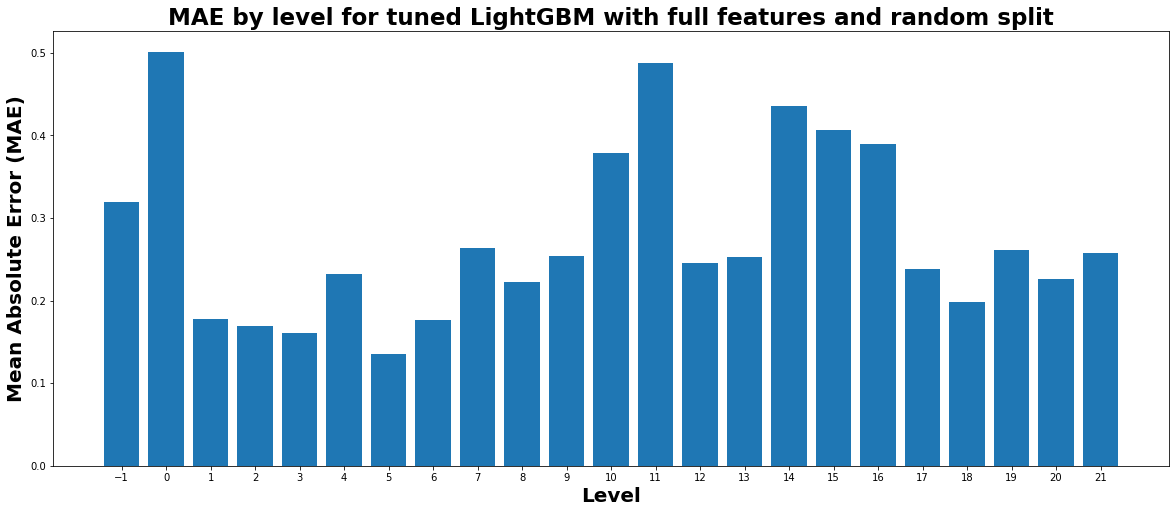

In [42]:
plot_mae_by_level(
    y_test_random_split,
    y_pred_test,
    title="MAE by level for tuned LightGBM with full features and random split",
)

In [43]:
predict = lgb_tuned.predict(X_test)
evaluate_round_predictions([0.5, 0.33, 0.45], y_test, predict)

Default:
RMSE: 0.19

Round type: 0.5
RMSE: 0.17

Round type: 0.33
RMSE: 0.25

Round type: 0.45
RMSE: 0.20



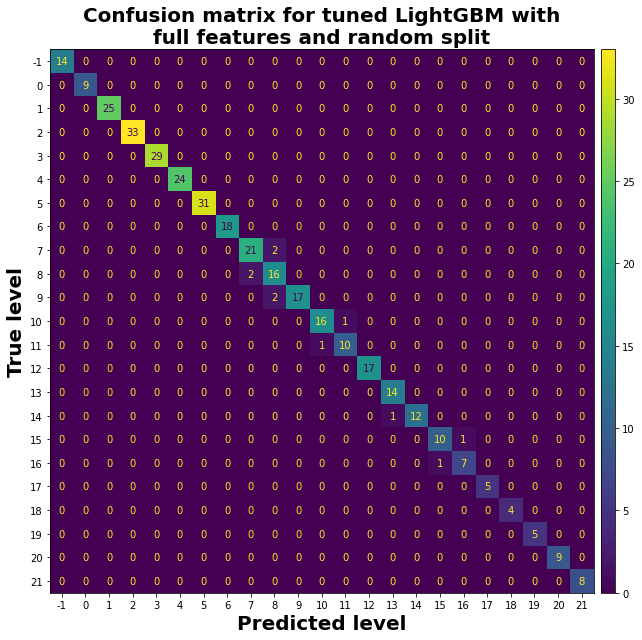

In [44]:
plot_confusion_matrix(
    predict,
    y_test,
    title="Confusion matrix for tuned LightGBM with\nfull features and random split",
)

## Summary

In [45]:
results

,Split type,Tuning type,Set of features,RMSE,MAE
0,chronological,default,full,0.965662,0.463517
1,chronological,Optuna,full,0.684602,0.393379
2,random,default,full,0.371349,0.246737
3,random,Optuna,full,0.329800,0.225846


In [46]:
from training.results import plot_summary

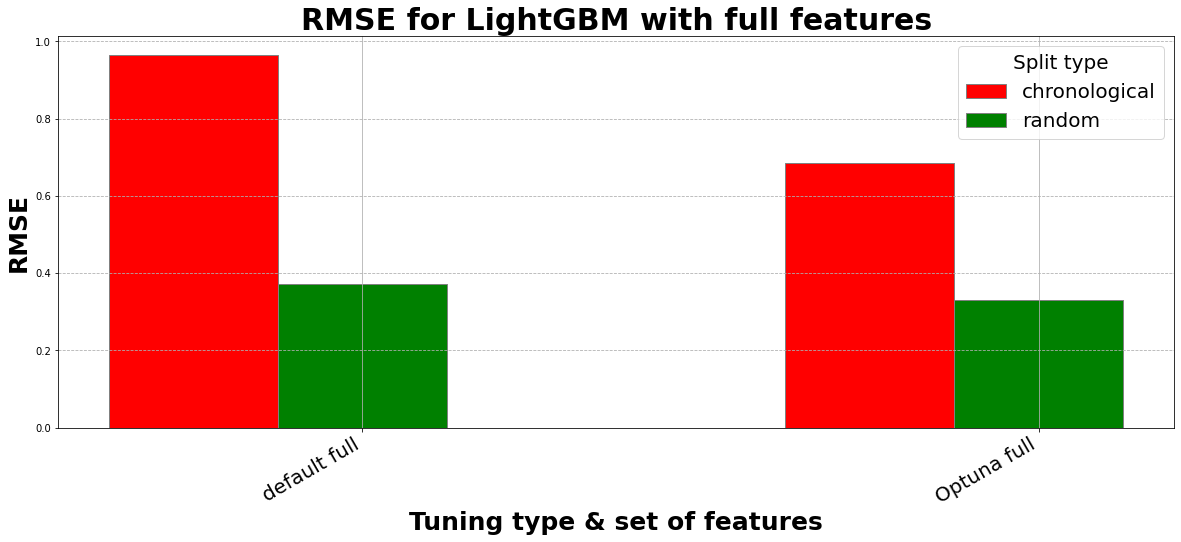

In [47]:
plot_summary(results, "RMSE", title="RMSE for LightGBM with full features")

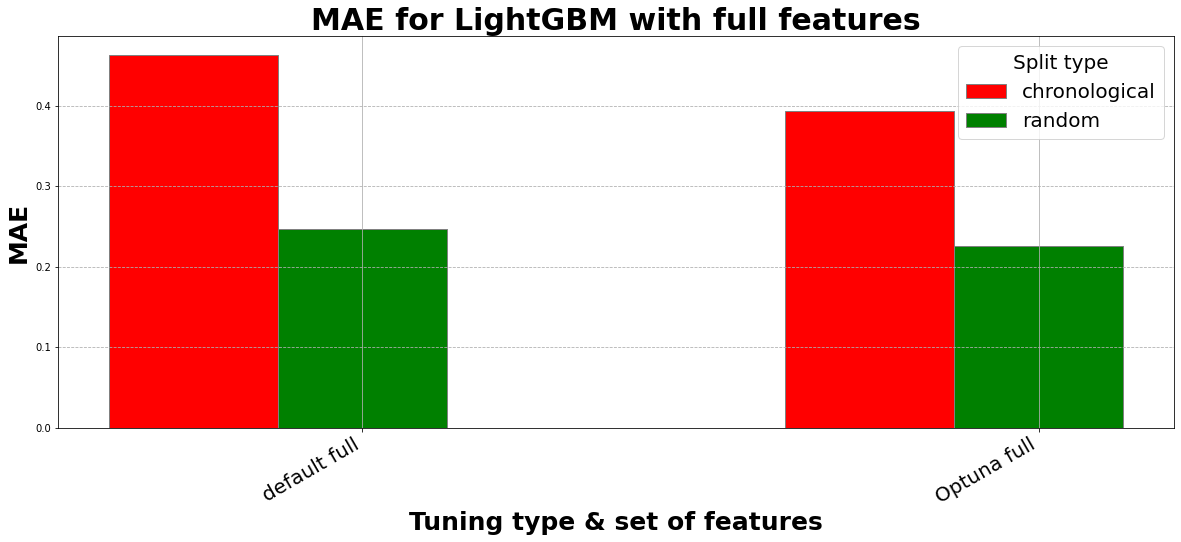

In [48]:
plot_summary(results, "MAE", title="MAE for LightGBM with full features")

In [49]:
results.to_csv("./lightgbm_full_results.csv")